# Importación de librerias

In [1]:
# Tratamiento de datos.

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import locale as lc
lc.setlocale(lc.LC_TIME, 'es_ES.UTF-8')

# Visualizaciones.

import matplotlib.pyplot as plt 

import seaborn as sns

#  Carga de datos

In [2]:
df_final = pd.read_parquet('../data/processed/df_final.parquet')

Se visualizan las filas y las columnas para comprobar que la base de datos se ha cargado correctamente.

In [3]:
df_final

,age,job,marital,education,housing,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id,income,kidhome,teenhome,dt_customer,numwebvisitsmonth
0,38,housemaid,married,basic.4y,no,no,telephone,261,1,nonexistent,1.1,93.994,36.4,4.857,5191,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29
1,57,services,married,high.school,no,no,telephone,149,1,nonexistent,1.1,93.994,36.4,38.000,5191,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7
2,37,services,married,high.school,si,no,telephone,226,1,nonexistent,1.1,93.994,36.4,4.857,5191,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5
3,40,admin.,married,basic.6y,no,no,telephone,151,1,nonexistent,1.1,93.994,36.4,38.000,5191,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29
4,56,services,married,high.school,no,si,telephone,307,1,nonexistent,1.1,93.994,36.4,38.000,5191,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39267,38,admin.,married,university.degree,no,no,cellular,618,2,nonexistent,1.4,93.444,36.1,38.000,5228,si,2015-10-13,4eed05de-2a98-4227-b488-32122009b638,68672,0,2,2014-03-08,22
39268,34,technician,married,professional.course,si,si,cellular,42,7,nonexistent,-0.1,93.200,42.0,38.000,5195,no,2018-03-17,0f0aca88-4088-4fe2-905f-44fb675d9493,73578,0,2,2014-03-11,26
39269,38,blue-collar,single,basic.6y,si,no,cellular,391,2,nonexistent,1.4,93.918,42.7,38.000,5228,no,2016-09-15,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,9816,2,2,2014-09-18,31
39270,38,admin.,married,university.degree,no,no,cellular,674,3,nonexistent,1.4,93.918,42.7,4.958,5228,no,2019-09-23,5f432048-d515-4bb5-9c94-62db451f88d4,156980,1,2,2014-05-17,7


## Separación de variables numéricas y categóricas

Se realiza una división entre variables numéricas y categóricas con el fin de analizarlas de manera diferenciada. Esta distinción permite aplicar técnicas estadísticas y exploratorias específicas para cada tipo de dato, optimizando la interpretación de patrones y el tratamiento posterior de las variables.

In [4]:
cols_num  = df_final.select_dtypes(include='number').columns

cols_cate = df_final.select_dtypes(include=['object', 'category']).columns

print(f"Las variables numéricas son: {cols_num}\n")
print(f"Las variables categóricas son: {cols_cate}")

Las variables numéricas son: Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'income', 'kidhome',
       'teenhome', 'numwebvisitsmonth'],
      dtype='object')

Las variables categóricas son: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome',
       'y', 'id'],
      dtype='object')


## Análisis univariante de variables numéricas

### Resumen estadistico

In [5]:
df_final.describe(include= 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
age,39272.0,39.6,9.69,17.0,33.0,38.0,45.0,98.0
duration,39272.0,257.45,259.43,0.0,102.0,179.0,318.0,4918.0
campaign,39272.0,2.56,2.76,1.0,1.0,2.0,3.0,43.0
emp.var.rate,39272.0,0.08,1.57,-3.4,-1.8,1.1,1.4,1.4
cons.price.idx,39272.0,93.57,0.58,92.2,93.08,93.44,93.99,94.77
cons.conf.idx,39272.0,40.55,4.63,26.9,36.4,41.8,42.7,50.8
euribor3m,39272.0,11.02,14.22,0.63,1.48,4.95,4.97,38.0
nr.employed,39272.0,5167.1,71.96,4963.0,5099.0,5191.0,5228.0,5228.0
income,39272.0,93182.0,50566.87,5841.0,49514.0,92916.0,136806.25,180802.0
kidhome,39272.0,1.0,0.82,0.0,0.0,1.0,2.0,2.0


**Observaciones:** 

`age`: La variable age presenta una media de 39,6 años y una desviación estándar de 9,69, lo que indica una dispersión moderada alrededor de la media. El rango va desde los 17 hasta los 98 años, con cuartiles en 33 (Q1), 38 (mediana) y 45 (Q3), de modo que la mayoría de clientes se concentra en edades adultas, entre la treintena y la cuarentena. El valor máximo (98) queda relativamente alejado del tercer cuartil, lo que sugiere la presencia de algunos individuos de edad muy avanzada que pueden considerarse valores extremos, aunque la cercanía entre media y mediana apunta a una distribución no excesivamente sesgada.

`duration`: Con una media de 257,45 segundos y una desviación estándar de 259,43, casi del mismo orden que la media, lo que refleja una variabilidad muy alta en la duración de las llamadas. El valor mínimo es 0 y el máximo alcanza 4.918 segundos, frente a cuartiles situados en 102 (Q1), 179 (mediana) y 318 (Q3); es decir, el 75 % de las llamadas dura menos de unos 5 minutos. La enorme distancia entre el máximo y el tercer cuartil, junto con la elevada desviación estándar, evidencia una distribución fuertemente asimétrica con cola derecha y presencia clara de outliers de llamadas excepcionalmente largas.

`campaign`: Esta variable con una media de 2,56 contactos y una desviación estándar de 2,76, indica cierta variabilidad en el número de interacciones con cada cliente. El mínimo es 1, mientras que el máximo asciende a 43 contactos; sin embargo, los cuartiles se sitúan en 1 (Q1), 2 (mediana) y 3 (Q3), lo que muestra que la mayoría de los clientes ha sido contactada muy pocas veces. La diferencia tan marcada entre el máximo y el tercer cuartil revela la existencia de un grupo reducido de clientes con un número anormalmente alto de contactos, configurando una distribución claramente sesgada hacia la derecha con posibles outliers.

`emp.var.rate`: Presenta una media de 0,08 y una desviación estándar de 1,57, reflejando una variación moderada en este indicador macroeconómico. El rango de valores va de −3,4 a 1,4, con cuartiles en −1,8 (Q1), 1,1 (mediana) y 1,4 (Q3), de modo que la mayoría de los datos se concentra en un intervalo relativamente estrecho. Aunque el mínimo se sitúa por debajo del primer cuartil, la amplitud no es tan extrema y no se aprecia una presencia tan marcada de outliers como en otras variables, tratándose de una serie relativamente estable.

`cons.price.idx`: Esta variable con una media de 93,57 y una desviación estándar muy reducida 0,58, lo que indica una dispersión mínima. Los valores oscilan entre 92,2 y 94,77, con cuartiles en 93,08 (Q1), 93,44 (mediana) y 93,99 (Q3), lo que muestra que la gran mayoría de los registros se agrupa en torno a un rango muy estrecho en torno a 93–94. Esta concentración tan elevada y la escasa diferencia entre cuartiles sugieren una variable muy estable, sin indicios relevantes de outliers ni de asimetrías acusadas.

`cons.conf.idx`: Con una media de 40,55 y una desviación estándar de 4,63, lo que implica un grado de variabilidad algo mayor que el índice de precios, pero todavía moderado. El rango va de 26,9 a 50,8, con cuartiles en 36,4 (Q1), 41,8 (mediana) y 42,7 (Q3), esto indica que la mitad central de los datos se concentra aproximadamente entre 36 y 43 puntos. Aunque los valores mínimo y máximo se separan de los cuartiles, la diferencia no es tan extrema, por lo que, aun existiendo variación, no se observan outliers tan extremos como en otras variables.

`euribor3m`: Se observa una media de 11,02 y una desviación estándar elevada 14,22, reflejando una variabilidad muy significativa en los tipos de interés. El mínimo se sitúa en 0,63 y el máximo en 38, mientras que los cuartiles se ubican en 1,48 (Q1), 4,95 (mediana) y 4,97 (Q3); es decir, la mayor parte de los valores se concentra en niveles relativamente bajos, muy por debajo del máximo. La gran distancia entre el tercer cuartil y el valor máximo, junto con la desviación estándar tan alta, revela una distribución fuertemente asimétrica con cola derecha y presencia de episodios de tipos de interés muy altos que podrían considerarse outliers.

`nr.employed`: Esta variable con una media de 5.167,1 y una desviación estándar de 71,96, lo que indica que la variabilidad relativa es baja comparada con el nivel medio. Los valores oscilan entre 4.963 y 5.228, con cuartiles en 5.099 (Q1), 5.191 (mediana) y 5.228 (Q3), por tanto, la mayor parte de los datos se agrupa en un intervalo estrecho. Esta estructura sugiere que se trata de un indicador macroeconómico muy estable, sin outliers marcados ni asimetrías relevantes, donde los cambios son suaves a lo largo del tiempo.

`Income`: Presenta una media de 93.182 y una desviación estándar de 50.566,87, lo que indica una dispersión muy elevada en los niveles de renta de los clientes. El rango de valores va desde 5.841 hasta 180.802, con cuartiles situados en 49.514 (Q1), 92.916 (mediana) y 136.806,25 (Q3), esto significa que el 50 % central de los individuos se encuentra entre unos 50.000 y 137.000 de ingreso, pero con casos extremos de ingresos muy bajos y muy altos. La combinación de un máximo muy por encima del tercer cuartil y una desviación estándar tan grande evidencia una distribución con fuerte asimetría hacia la derecha y presencia clara de outliers de alta renta.

`Kidhome`: En esta variable se observa una media de 1,0 y una desviación estándar de 0,82. Sus valores están acotados entre 0 y 2, y los cuartiles se sitúan en 0 (Q1), 1 (mediana) y 2 (Q3), lo que indica que la distribución se reparte principalmente entre hogares sin niños pequeños, con un niño o con dos. Dado su rango discreto y reducido, no se observan valores atípicos y la variabilidad está completamente explicada por las pocas categorías posibles, lo que facilita su interpretación y modelización.

`Teenhome`: Con una media de 1,0 y una desviación estándar de 0,82, replicando el comportamiento de Kidhome. Los valores también oscilan entre 0 y 2, con cuartiles en 0 (Q1), 1 (mediana) y 2 (Q3), de modo que la mayoría de los hogares tiene entre 0 y 2 adolescentes. Al tratarse igualmente de una variable discreta con dominio muy limitado, no se detectan outliers y la distribución resulta sencilla y estable.

`NumWebVisitsMonth`: En este caso se observa una media de 16,58 visitas mensuales y una desviación estándar de 9,25, lo que indica una variabilidad moderada a alta en la intensidad de uso de la web por parte de los clientes. El mínimo es 1 y el máximo 32 visitas, con cuartiles en 9 (Q1), 17 (mediana) y 25 (Q3), mostrando que el 50 % central de los clientes realiza entre 9 y 25 visitas al mes. Aunque el valor máximo se sitúa por encima del tercer cuartil, la distancia no es tan extrema como en otras variables, por lo que puede interpretarse como una distribución ligeramente sesgada hacia la derecha, con algunos usuarios más intensivos pero sin outliers tan extremos como en duration o Income.










In [6]:
df_final[cols_num].median().round(2)

age                     38.0
duration               179.0
campaign                 2.0
emp.var.rate             1.1
cons.price.idx         93.44
cons.conf.idx           41.8
euribor3m               4.95
nr.employed           5191.0
income               92916.0
kidhome                  1.0
teenhome                 1.0
numwebvisitsmonth       17.0
dtype: Float64

**Observaciones:**

`age`: La mediana de la edad es 38 años, ligeramente por debajo de la media 39,6, esto indica una distribución razonablemente equilibrada, con una ligera cola derecha debida a valores altos de hasta 98 años. La mayor parte de los clientes se concentra entre los 30 y los 40 y tantos años. Los casos de edad muy elevada actúan como valores extremos pero no dominan la distribución.

`duration`: La mediana de la duración es 179 segundos, claramente inferior a la media 257,45. Esta diferencia confirma una distribución muy sesgada a la derecha, la mayoría de las llamadas son relativamente cortas, mientras que unas pocas llamadas son muy largas de hasta 4.918 segundos, lo que eleva la media y constituyen outliers claros.

`campaign`: La mediana es 2 contactos, frente a una media de 2,56, lo que sugiere que la mayoría de los clientes recibió muy pocos contactos, pero existe un pequeño grupo con un número mucho mayor de interacciones de hasta 43. La media por encima de la mediana refleja una cola derecha marcada y la presencia de clientes sobrecontactados.

`emp.var.rate`: La mediana es 1,1, mientras que la media es 0,08. El hecho de que la mediana sea bastante superior a la media indica que los valores negativos por debajo de 0 tienen peso suficiente como para arrastrar la media hacia abajo. La distribución combina periodos negativos y positivos, con mayor concentración en valores positivos moderados pero con episodios recesivos que afectan a la media.

`cons.price.idx`: La mediana es 93,44 y la media 93,57, la proximidad entre ambas, junto con una desviación estándar muy baja, muestra una distribución muy concentrada y prácticamente simétrica. No se aprecia influencia relevante de valores extremos, y el índice de precios se comporta como una variable muy estable en el tiempo.
.............
`cons.conf.idx`: La mediana de la confianza del consumidor es 41,8, ligeramente por encima de la media (40,55). Esto sugiere una ligera asimetría hacia valores algo más bajos, probablemente por la presencia de algunos períodos con confianza especialmente baja que reducen la media. Aun así, la dispersión es moderada y no se observan outliers extremos.

`euribor3m`: La mediana de euribor3m es 4,95, mientras que la media asciende a 11,02. La diferencia es muy significativa y confirma una distribución fuertemente sesgada a la derecha: la mayoría de los valores de tipos de interés son relativamente bajos o moderados, pero existen periodos con tipos muy altos (hasta 38) que elevan la media y se comportan como outliers.

`nr.employed`: La mediana es 5.191 empleados y la media 5.167,1. Ambas están muy próximas y la desviación estándar es reducida, lo que indica que la variable es muy estable y apenas presenta asimetría. Se trata de un indicador macroeconómico con variaciones suaves en torno a un nivel medio bien definido.

`Income`: La mediana de ingresos es 92.916, mientras que la media es algo superior (93.182), pero lo realmente relevante es la elevada desviación estándar y el rango muy amplio (hasta 180.802). La media ligeramente por encima de la mediana, unida a los valores máximos muy altos, revela una distribución con cola derecha: hay individuos de renta muy elevada que aumentan la media, aunque la “situación central” del cliente típico se aproxima más a la mediana.

`Kidhome`: La mediana es 1 y la media también es 1, lo que indica una distribución muy equilibrada entre hogares con 0, 1 y 2 niños pequeños. El rango está acotado y no hay outliers posibles, por lo que la mediana recoge fielmente el patrón central de la variable.

`Teenhome`: De forma análoga, Teenhome tiene mediana 1 y media 1, con valores entre 0 y 2 adolescentes en el hogar. Esto sugiere una distribución equilibrada en el rango permitido, sin valores extremos y con un comportamiento similar al de Kidhome.

`NumWebVisitsMonth`: La mediana es 17 visitas mensuales, muy cercana a la media (16,58). Esto indica una distribución relativamente compensada, aunque con cierta dispersión (desviación estándar 9,25). El rango (1–32) muestra usuarios con actividad muy baja y otros con uso intensivo, pero sin generar una asimetría tan extrema como en duration o Income; la mediana describe bien el nivel de uso “típico” del canal web.

## Histogrmas

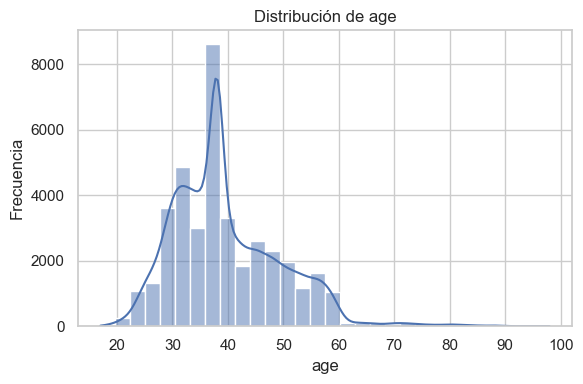

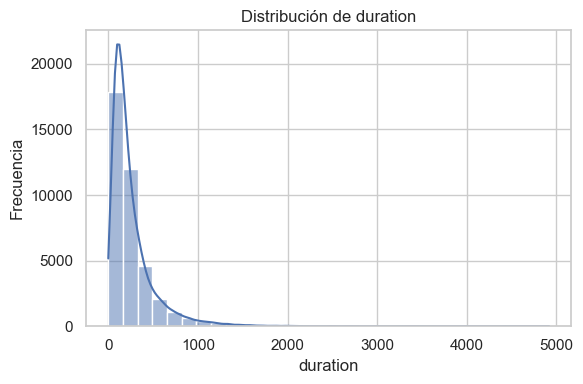

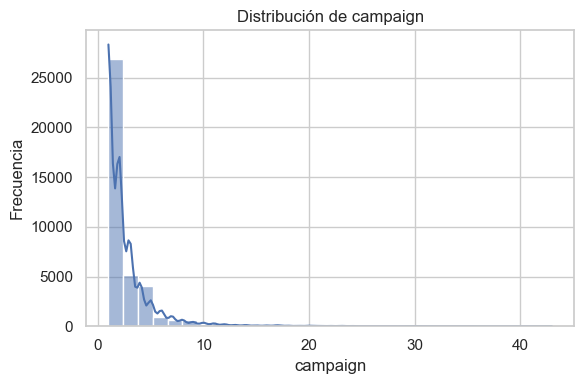

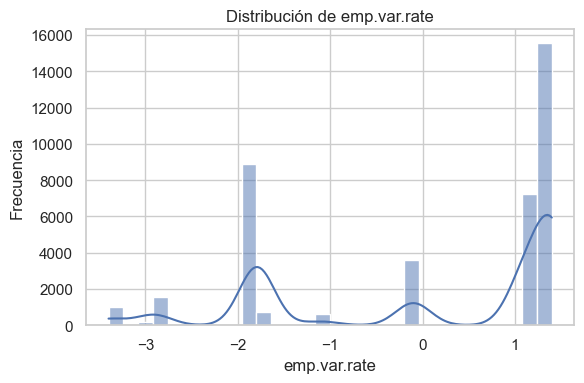

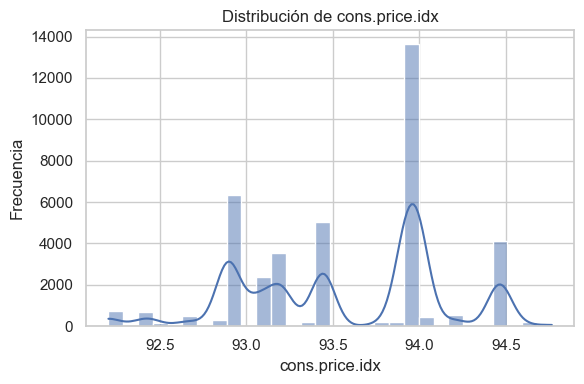

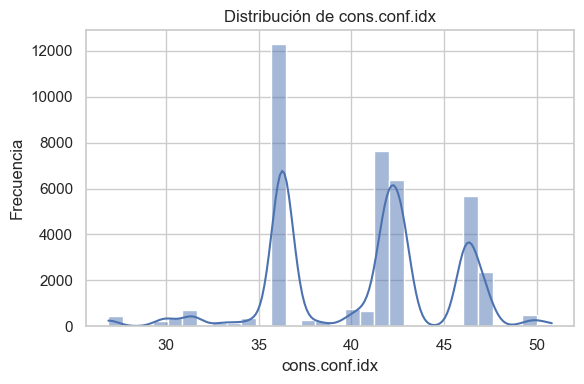

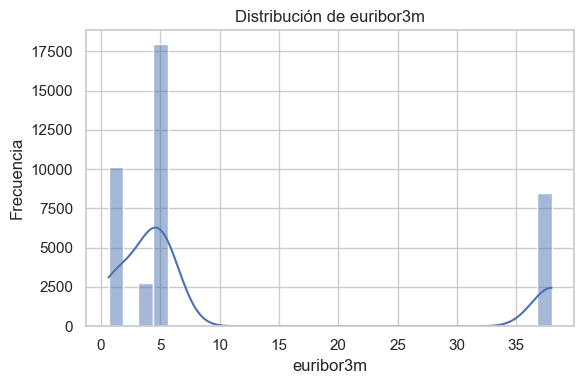

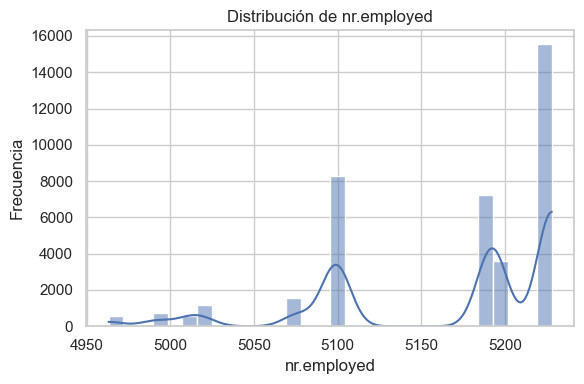

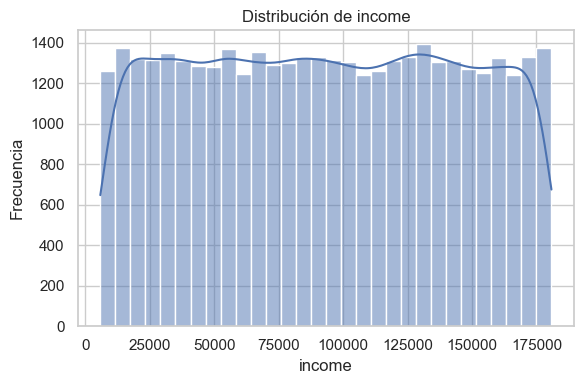

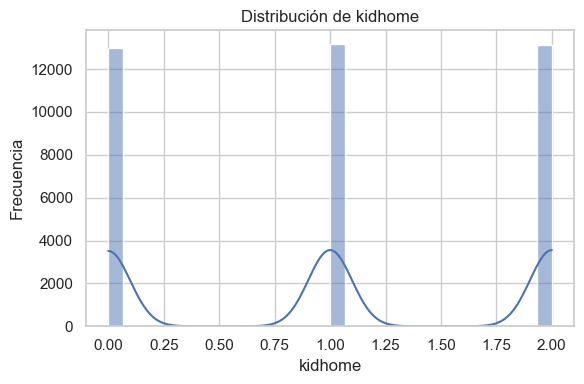

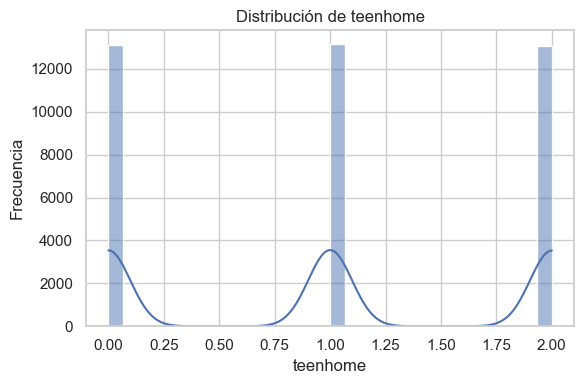

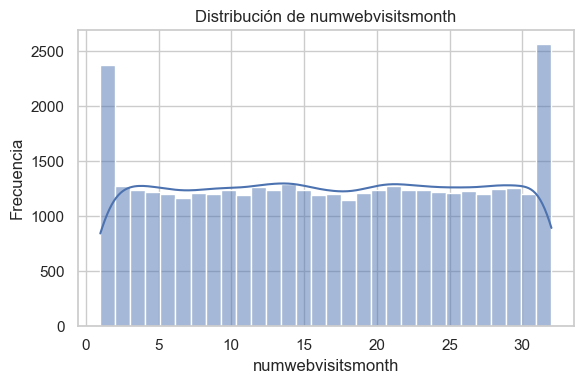

In [7]:
sns.set(style="whitegrid", context="notebook")

for col in cols_num:

    plt.figure(figsize=(6, 4)) 

    sns.histplot(df_final[col], bins=30, stat="count", kde=True )

    plt.title(f'Distribución de {col}')

    plt.xlabel(col)

    plt.ylabel('Frecuencia')

    plt.tight_layout()

    plt.show()

**Observaciones:**

`age`: La variable age muestra una concentración marcada de observaciones entre los 30 y los 50 años, configurando una distribución relativamente equilibrada en su tramo central. Aunque presenta una ligera cola a la derecha por la existencia de edades más avanzadas, estos valores son poco frecuentes y no distorsionan de forma relevante la forma general. La variabilidad puede considerarse moderada y la presencia de outliers es limitada, lo que sugiere una distribución bastante estable y representativa del perfil típico de los clientes.

`duration`: La distribución evidencia un patrón claramente sesgado a la derecha, con una elevada concentración de llamadas de corta duración y un descenso progresivo hacia valores mayores. La cola extensa y la presencia de llamadas extremadamente largas generan una dispersión alta y un conjunto de outliers que impactan de forma notable en la media. Este comportamiento es habitual en variables de tiempo y conviene tenerlo en cuenta de cara a la modelización, ya que puede requerir transformaciones o un tratamiento específico de valores extremos.

`campaign`:La variable presenta una distribución fuertemente asimétrica hacia la derecha, donde la mayoría de los individuos recibe un número reducido de contactos (entre 1 y 3), mientras que un grupo minoritario registra cifras mucho mayores. Este desequilibrio da lugar a una cola alargada y a valores atípicos que amplían el rango de la variable. Aunque la dispersión en el núcleo central es baja, la existencia de casos extremos es relevante y debe considerarse en estudios posteriores, especialmente si la variable se utiliza como predictor.

`variable emp.var.rate`: Esta variable presenta una distribución concentrada en un intervalo relativamente estrecho, con valores negativos y positivos que reflejan distintos ciclos económicos. Aunque existe cierta asimetría, la variabilidad es moderada y no se observan desviaciones extremas que distorsionen la forma general. El comportamiento es estable y los valores se agrupan cerca de los niveles más frecuentes, por lo que no se identifican outliers especialmente relevantes.

`cons.price.idx`: En este caso la distribución es muy compacta y se mantiene dentro de un rango reducido, lo que indica una variabilidad mínima. El comportamiento es prácticamente simétrico y no se aprecian valores anómalos. Esta estabilidad es propia de indicadores macroeconómicos de precios, que suelen presentar fluctuaciones suaves a lo largo del tiempo. En consecuencia, la variable no plantea problemas de dispersión ni de sesgo.

`cons.conf.idx`: Se muestra una concentración notable alrededor del valor central, aunque con algo más de dispersión que el índice de precios. La distribución puede presentar una ligera asimetría, pero los valores se mantienen dentro de un rango razonable sin presencia evidente de outliers severos. La variabilidad moderada refleja cambios en la percepción de confianza del consumidor, pero sin generar distorsiones significativas en el conjunto de datos.

`euribor3m`: Se observa que la distribución es claramente sesgada a la derecha, con la mayoría de observaciones agrupadas en valores bajos y un número reducido de episodios de tipos de interés muy elevados. Esta cola alargada genera una dispersión considerable y evidencia la presencia de valores extremos que influyen en la media. Es una variable con alta variabilidad, típica de indicadores financieros sensibles a cambios bruscos en el mercado.

`nr.employed`: Esta variable presenta una distribución extremadamente concentrada, con valores que se mantienen en un intervalo muy estrecho. La forma es casi simétrica y la dispersión muy baja, lo que refleja un comportamiento estable y sin irregularidades destacables. No se detectan outliers y la distribución es representativa de un indicador estructural del mercado laboral con variaciones suaves.

`Income`: En este caso la distribuión es claramente asimétrica hacia la derecha, con la mayoría de los clientes situados en niveles de renta intermedios y un grupo minoritario con ingresos muy superiores. Esta cola pronunciada genera alta dispersión y valores extremos que elevan de forma notable la media. Se trata de una variable muy heterogénea, donde la presencia de outliers puede influir significativamente en análisis posteriores y conviene valorarla con especial atención.

`Kidhome`: Al estar acotada entre 0 y 2, muestra una distribución discreta y equilibrada. Los valores se concentran en este rango estrecho y no existen outliers posibles. La variabilidad es reducida y la forma de la distribución se ajusta al comportamiento esperado en un conteo pequeño de niños en el hogar, sin presentar sesgos significativos.

`Teenhome`: Esta variable está limitada a los valores 0, 1 y 2, lo que genera una distribución compacta y sin asimetrías marcadas. La dispersión es mínima y la distribución carece de valores extremos por definición. El comportamiento es estable y coherente con una variable categorizada en un rango discreto y reducido.

`NumWebVisitsMonth`: presenta una distribución moderadamente dispersa, con la mayoría de observaciones entre 9 y 25 visitas mensuales y algunos clientes con niveles de actividad superiores. Existe una ligera asimetría hacia la derecha, aunque sin valores extremos tan pronunciados como en otras variables. La forma general sugiere un uso heterogéneo del canal web, manteniéndose dentro de un comportamiento razonablemente estable.

## Boxplot

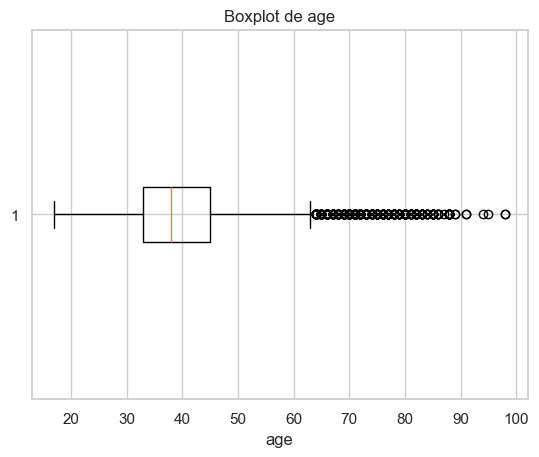

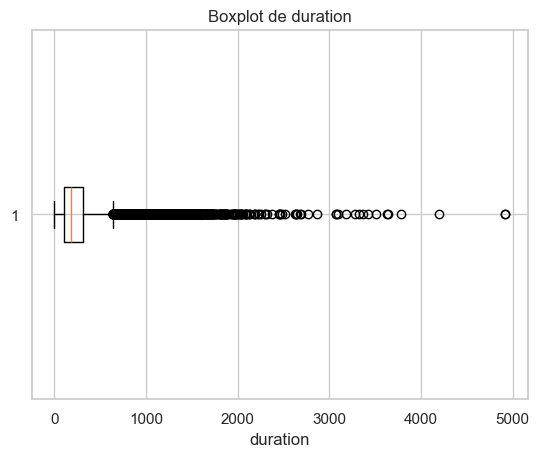

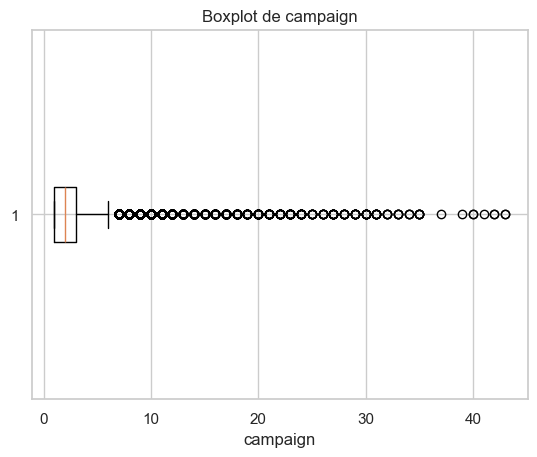

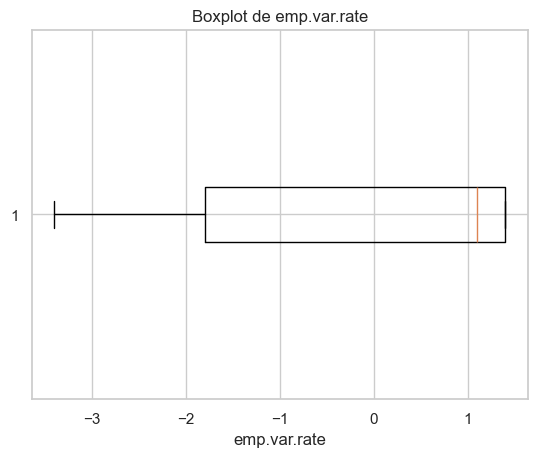

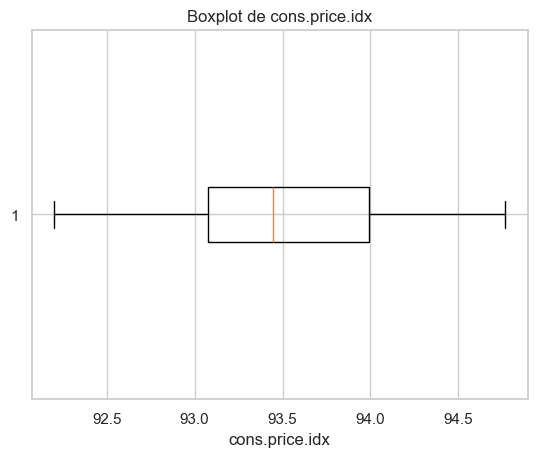

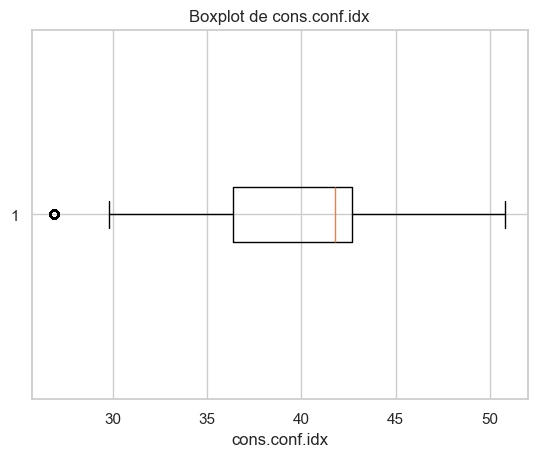

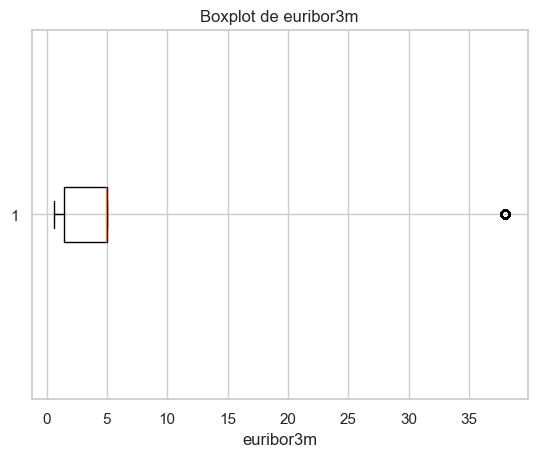

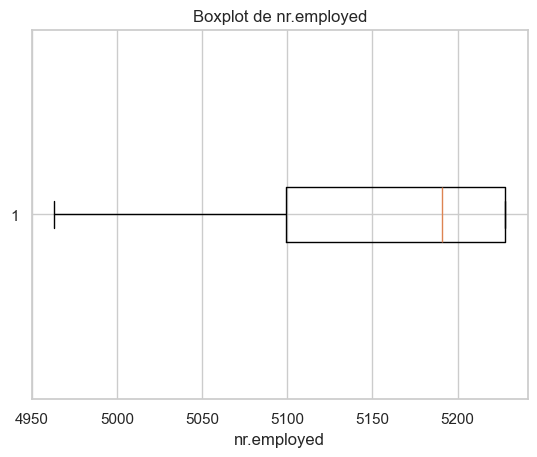

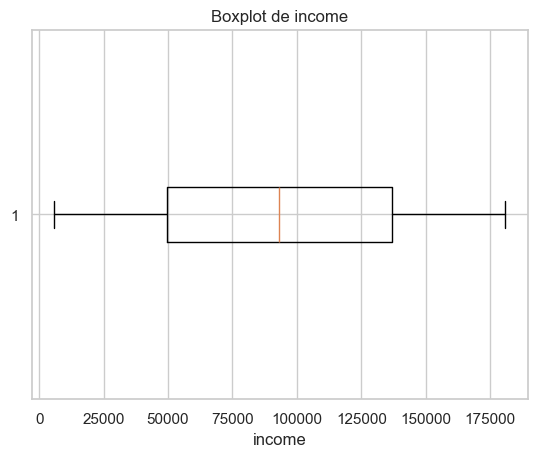

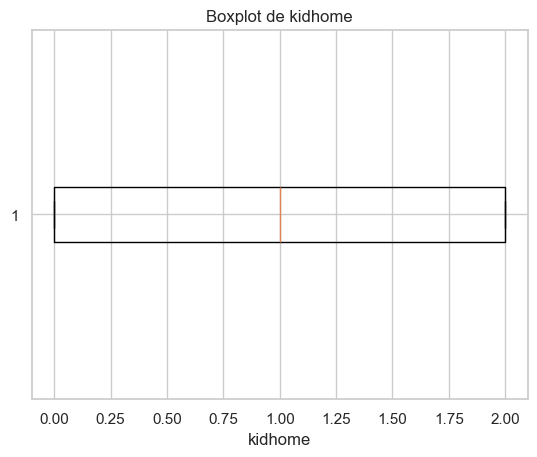

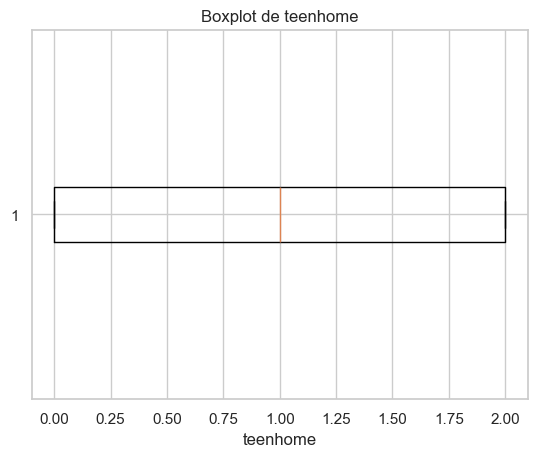

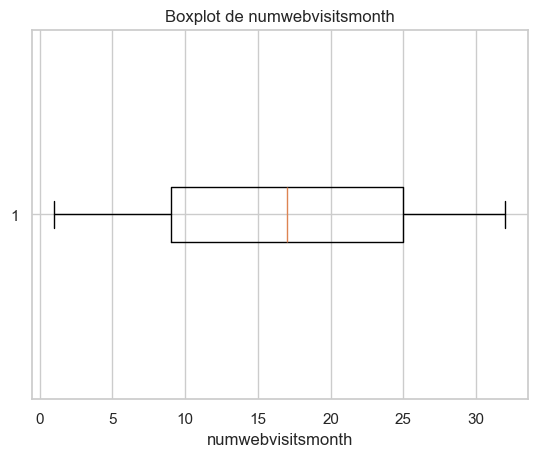

In [8]:
for col in cols_num:

    plt.boxplot(df_final[col], vert=False)

    plt.title(f'Boxplot de {col}')

    plt.xlabel(col)
    
    plt.show()

**Observaciones:**

`age`: Muestra algunos valores extremos en edades muy avanzadas, alcanzando los 98 años, claramente alejados del rango central situado entre los 30 y los 50 años. Aunque poco frecuentes, estos valores son plausibles y no parecen indicar errores de registro.

`duration`: Se observan numerosos valores atípicos en la parte alta de la distribución, destacando duraciones que llegan hasta 4.918 segundos, muy superiores al rango habitual de llamadas, generalmente por debajo de 300 segundos. Estos outliers representan llamadas excepcionalmente largas y, aunque estadísticamente extremos, son coherentes con la naturaleza de la variable.

`campaign`: muestra una cola derecha destacada, con múltiples outliers asociados a clientes que registran más de 40 contactos, alcanzando un máximo de 43. Estos valores, aunque extremos, resultan razonables en contextos de campañas intensivas y no parecen indicar inconsistencias en la base de datos.

`emp.var.rate`: Apenas se aprecian valores extremos. El mínimo registrado es –3.4, que aparece levemente alejado del resto, pero sigue siendo coherente con períodos económicos negativos. No se identifican outliers que resulten sospechosos o incompatibles con la variable.

`cons.price.idx`: Se concentra en un rango muy estrecho entre 92.2 y 94.77, sin presencia de outliers significativos. La estabilidad del indicador hace que cualquier valor ligeramente separado siga siendo estadísticamente y económicamente razonable.

`cons.conf.idx`: Pueden observarse valores extremos como 26.9 en el límite inferior y 50.8 en el superior. Aunque estadísticamente alejados, estos valores reflejan variaciones reales en la confianza del consumidor y no parecen indicar anomalías.

`euribor3m`: Presenta numerosos outliers en valores elevados, llegando hasta 38.0, muy alejados del rango típico que se encuentra entre 1 y 5. Estos picos representan episodios de tipos de interés excepcionalmente altos. Aunque extremos, son plausibles dentro del comportamiento histórico del euríbor.

`nr.employed`: Esta variable contiene identificadores de empleados que oscilan entre 4963 y 5228. Al tratarse de códigos categóricos representados numéricamente, no existe la noción de outliers en sentido estadístico. Todas las variaciones observadas son simplemente diferencias entre identificadores y no reflejan valores extremos ni comportamientos anómalos.

`Income`: Presenta una gran cantidad de valores extremos en niveles de renta elevados, alcanzando los 180.802, muy superiores al rango central de ingresos. Estos outliers son realistas y comunes en variables económicas, donde las colas derechas pronunciadas son habituales.

`Kidhome`: Esta limitada a valores entre 0 y 2, no muestra outliers. Todos los registros se encuentran dentro del dominio definido y no existen valores que puedan considerarse atípicos.

`Teenhome`: Solo toma valores 0, 1 o 2, por lo que no presenta valores extremos. La distribución es completamente coherente con su naturaleza categórica discreta.

`NumWebVisitsMonth`: Muestra algunos valores elevados que se identifican como outliers, alcanzando hasta 32 visitas mensuales, claramente por encima del comportamiento típico situado entre 9 y 25 visitas. Estos valores representan usuarios altamente activos y resultan razonables dentro del uso web.

## Análisis univariante de variables categóricas

### Frecuencias y proporciones

In [9]:
for col in cols_cate:

    print(f'\nColumna: {col}')

    display(df_final[col].value_counts().head(10))
    
    display((df_final[col].value_counts(normalize=True).head(10) * 100).round(2))


Columna: job


job
admin.           10194
blue-collar       8793
technician        6547
services          3806
management        2805
retired           1611
entrepreneur      1403
self-employed     1395
housemaid         1029
unemployed         996
Name: count, dtype: int64

job
admin.           25.96
blue-collar      22.39
technician       16.67
services          9.69
management        7.14
retired           4.10
entrepreneur      3.57
self-employed     3.55
housemaid         2.62
unemployed        2.54
Name: proportion, dtype: float64


Columna: marital


marital
married     23762
single      11091
divorced     4419
Name: count, dtype: int64

marital
married     60.51
single      28.24
divorced    11.25
Name: proportion, dtype: float64


Columna: education


education
university.degree      12142
high.school             9494
basic.9y                6030
professional.course     5226
basic.4y                4103
basic.6y                2259
illiterate                18
Name: count, dtype: int64

education
university.degree      30.92
high.school            24.17
basic.9y               15.35
professional.course    13.31
basic.4y               10.45
basic.6y                5.75
illiterate              0.05
Name: proportion, dtype: float64


Columna: housing


housing
si    21101
no    18171
Name: count, dtype: int64

housing
si    53.73
no    46.27
Name: proportion, dtype: float64


Columna: loan


loan
no    33150
si     6122
Name: count, dtype: int64

loan
no    84.41
si    15.59
Name: proportion, dtype: float64


Columna: contact


contact
cellular     25172
telephone    14100
Name: count, dtype: int64

contact
cellular     64.1
telephone    35.9
Name: proportion, dtype: float64


Columna: poutcome


poutcome
nonexistent    33928
failure         4071
success         1273
Name: count, dtype: int64

poutcome
nonexistent    86.39
failure        10.37
success         3.24
Name: proportion, dtype: float64


Columna: y


y
no    34911
si     4361
Name: count, dtype: int64

y
no    88.9
si    11.1
Name: proportion, dtype: float64


Columna: id


id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
5e3483e5-236d-437d-8351-541f9d09b9dd    1
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    1
071e39a6-519d-4286-8001-88cc9b237e01    1
Name: count, dtype: int64

id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.0
089b39d8-e4d0-461b-87d4-814d71e0e079    0.0
e9d37224-cb6f-4942-98d7-46672963d097    0.0
3f9f49b5-e410-4948-bf6e-f9244f04918b    0.0
9991fafb-4447-451a-8be2-b0df6098d13e    0.0
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    0.0
d63ede72-0b6d-45b1-8872-385ac6897f65    0.0
5e3483e5-236d-437d-8351-541f9d09b9dd    0.0
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    0.0
071e39a6-519d-4286-8001-88cc9b237e01    0.0
Name: proportion, dtype: float64

`job`: Esta variable está dominada por los perfiles admin. (25,96 %), blue-collar (22,39 %) y technician (16,67 %), que en conjunto agrupan más de la mitad de la muestra. A continuación aparecen services (9,69 %) y management (7,14 %). El resto de ocupaciones retired, entrepreneur, self-employed, housemaid y unemployed presentan frecuencias más reducidas ,todas por debajo del 5 % individualmente. No se aprecia un desbalance extremo, pero sí una clara concentración en unos pocos tipos de empleo administrativos y trabajamos manuales.

`marital`: La categoría married es claramente mayoritaria, con un 60,51 % de los registros, seguida de single (28,24 %) y, en menor medida, divorced (11,25 %). Existe una distribución razonable, aunque con un peso notable de personas casadas, algo esperable en poblaciones adultas.

`education`: Se muestra como categorías predominantes university.degree (30,92 %) y high.school (24,17 %). Les siguen basic.9y (15,35 %), professional.course (13,31 %), basic.4y (10,45 %) y basic.6y (5,75 %). La categoría illiterate es prácticamente residual (0,05 %). La distribución está relativamente repartida, con un ligero sesgo hacia niveles educativos medios y altos, sin desbalance extremo salvo la práctica ausencia de analfabetismo.

`housing`: La proporción de clientes con hipoteca ("si") es 53,73 %, frente al 46,27 % sin hipoteca. La distribución está bastante equilibrada, sin un desbalance acusado entre ambas categorías.

`loan`: Se observa un desbalance claro: la categoría "no" agrupa el 84,41 % de los casos, mientras que "si" solo representa el 15,59 %. Esto indica que la mayoría de los clientes no tiene un préstamo personal activo, algo que conviene tener en cuenta en modelización (clase minoritaria).

`contact`: La mayoría de las comunicaciones se realizan mediante cellular (64,1 %), frente a telephone (35,9 %). Existe cierta preferencia por el canal móvil, aunque la distribución no es extremadamente desequilibrada.

`poutcome`: refleja un desbalance muy notable: nonexistent representa el 86,39 % de los registros, mientras que failure alcanza el 10,37 % y success solo el 3,24 %. Esto indica que en la gran mayoría de los casos no hubo campaña previa registrada, y que los casos de éxito previo son claramente minoritarios.

`y`: Es la variable objetivo, la categoría "no" es claramente dominante, con un 88,9 %, frente al 11,1 % de "si". Se trata de un fuerte desbalance de clases, típico en problemas de respuesta a campañas, y debe considerarse en fases posteriores del analisis.

`id`: Contiene identificadores únicos de cliente; cada valor aparece una sola vez. Por tanto, no tiene una distribución categórica interpretable en términos de mayorías o desbalances, sino que actúa como clave única para cada registro.


## Gráficos de barras

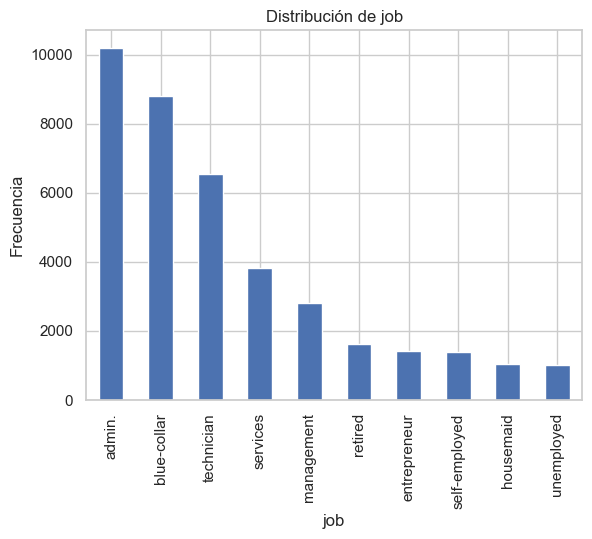

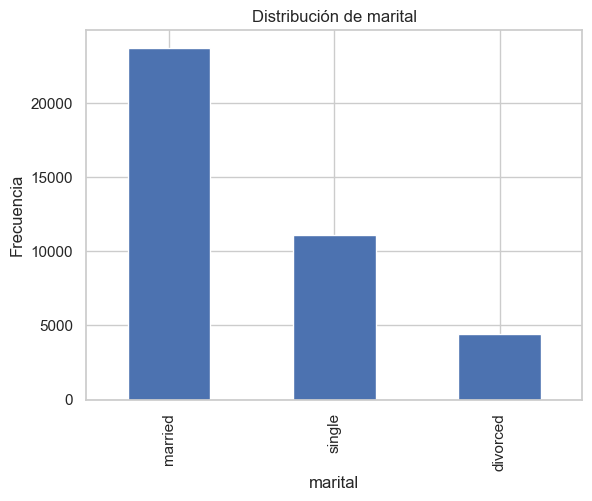

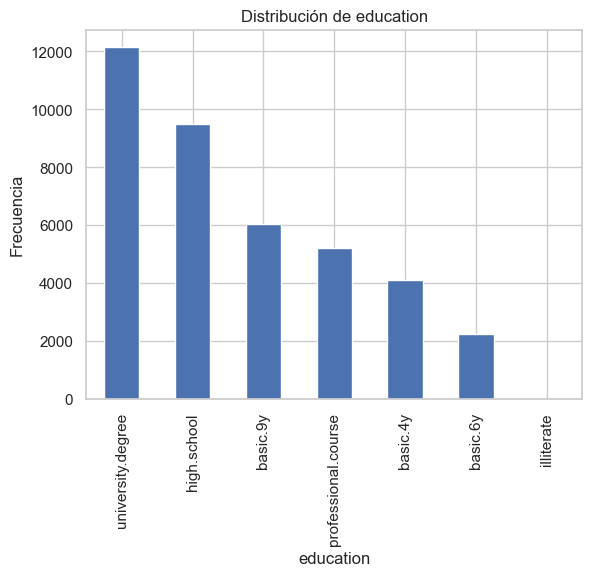

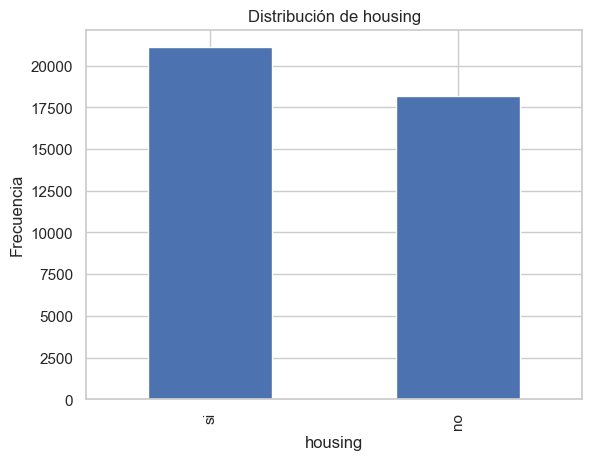

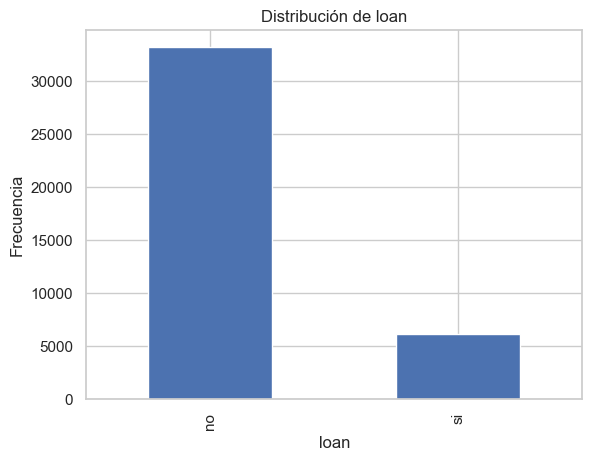

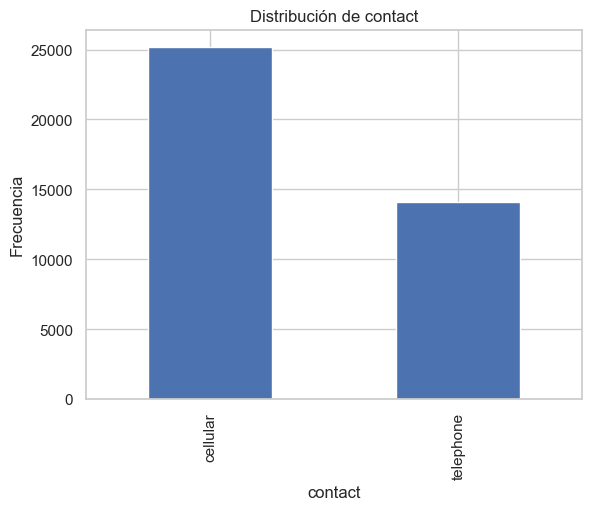

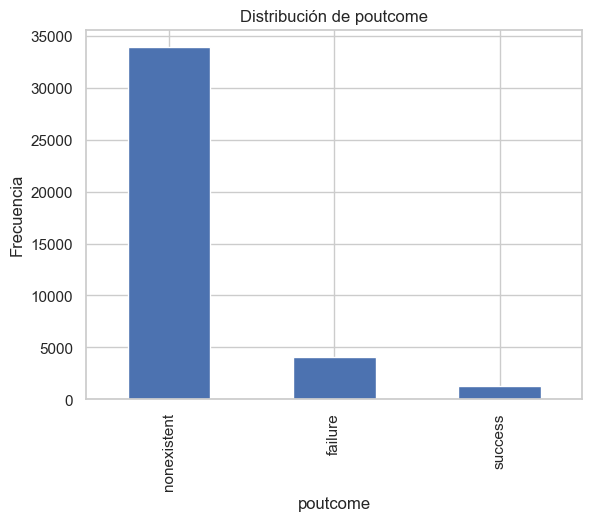

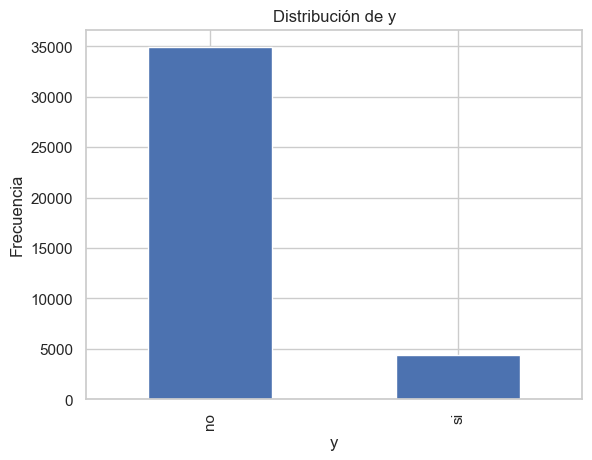

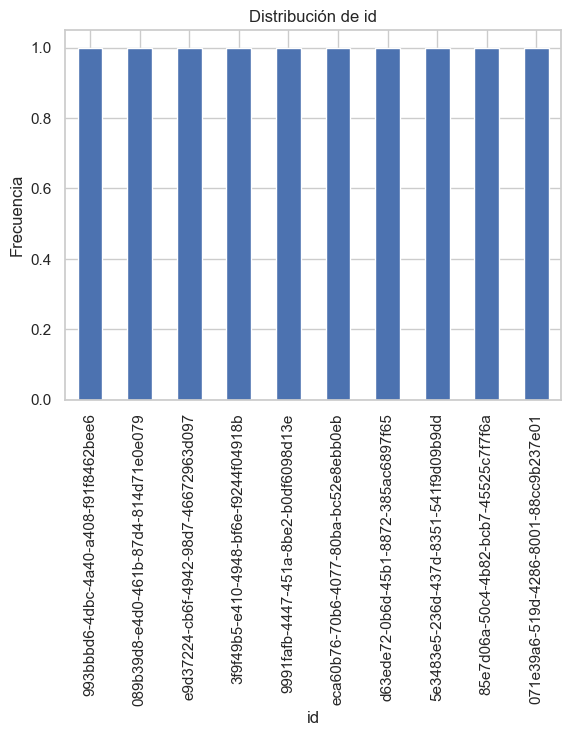

In [10]:
for col in cols_cate:

    df_final[col].value_counts().head(10).plot(kind='bar')

    plt.title(f'Distribución de {col}')

    plt.ylabel('Frecuencia')
    
    plt.show()

**Observaciones:**

`job`: Esta distribución muestra que los perfiles admin. (25,96 %), blue-collar (22,39 %) y technician (16,67 %) concentran la mayor parte de los clientes. El resto de ocupaciones (services, management, retired, entrepreneur, self-employed, housemaid, unemployed) tienen pesos menores. Esta segmentación es relevante para el análisis porque la situación laboral suele estar estrechamente vinculada con ingresos, estabilidad económica y propensión a contratar productos financieros.

`education`: Se observa como predominan los niveles university.degree (30,92 %) y high.school (24,17 %), seguidos de categorías de educación básica y formación profesional. La categoría illiterate es residual (0,05 %). El nivel educativo es un factor clave para interpretar capacidad económica, comprensión de productos financieros y comportamiento ante la campaña, por lo que merece ser destacado.

`housing`: Esta variable muestra una distribución relativamente equilibrada entre “si” (53,73 %) y “no” (46,27 %). Tener o no hipoteca aporta información sobre el compromiso financiero y la carga de deuda del cliente, lo que puede influir en su disposición a contratar nuevos productos de ahorro o inversión.

`loan`: En este caso sí aparece un desbalance claro, “no” representa el 84,41 % y “si” el 15,59 %. La mayoría de clientes no tiene préstamo personal, lo que convierte a la categoría “sí” en un grupo minoritario interesante para el análisis, ya que tener préstamos puede condicionar la capacidad de asumir nuevas obligaciones financieras o, por el contrario, mostrar mayor vinculación con la entidad.

`contact`: Esta variable refleja que el 64,1 % de los contactos se efectúan mediante telefonía móvil (cellular) y el 35,9 % por línea fija (telephone). Esta información es relevante porque el canal de contacto puede influir en la tasa de respuesta, el móvil suele asociarse a mayor disponibilidad y contacto más directo, mientras que la línea fija podría corresponder a perfiles de edad más avanzados o diferentes hábitos.

`poutcome`: En este caso podemos observar como la categoría “nonexistent” es claramente dominante (86,39 %), mientras que “failure” representa el 10,37 % y “success” solo el 3,24 %. La gran mayoría de clientes no tiene historial de campaña previa, y los casos de éxito anterior son muy escasos. Esta variable puede ser muy informativa cuando existe historial, pero su alta concentración en “nonexistent” limita parcialmente su capacidad discriminativa.

`y`: La variable y muestra un desbalance muy marcado, la categoría “no” representa el 88,9 % de los registros, mientras que “si” únicamente alcanza el 11,1 %. Esto revela que la respuesta positiva a la campaña es claramente minoritaria, configurando un problema de clase desbalanceada que debe considerarse en cualquier análisis predictivo o evaluación del rendimiento del modelo.

## Variable objetivo `y`

### Distribución de `y`

La variable objetivo `y` recoge si el cliente ha contratado o no el producto tras la campaña. El recuento muestra **34.911 “no”** frente a **4.361 “si”**, lo que supone aproximadamente un **88,9 %** de respuestas negativas y un **11,1 %** de respuestas positivas.

Esta distribución pone de manifiesto un fuerte desbalance de clases, con una tasa de conversión cercana al 11 %. En consecuencia, un modelo que predijera siempre `"no"` tendría una precisión aparente elevada, pero sería inútil para identificar clientes propensos a responder positivamente.

En resumen, la variable `y` confirma un escenario típico de campañas de marketing directo: muchas negativas y pocas conversiones, lo que condiciona de forma directa el enfoque que deberá adoptarse en los modelos predictivos.

## Análisis bivariante de variables numéricas vs `y`

### Boxplots agrupados por valor de `y`

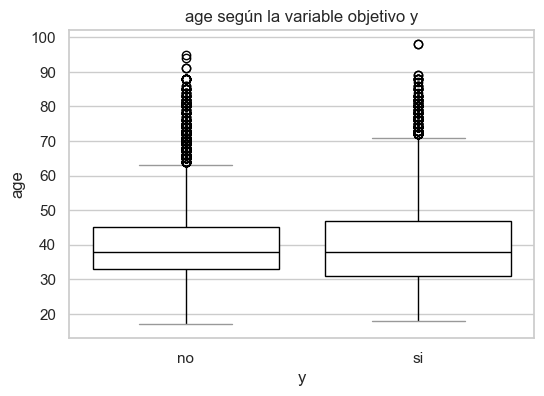

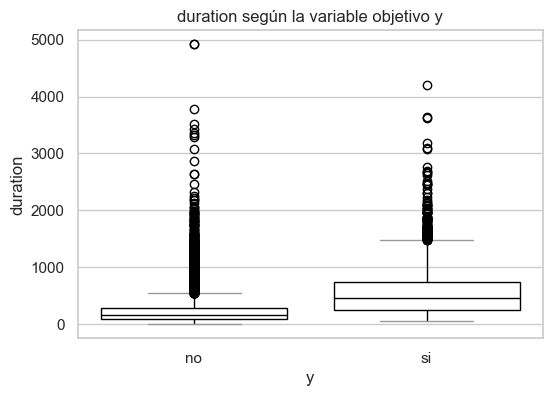

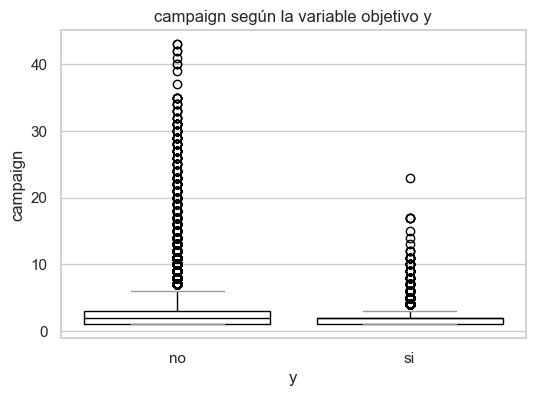

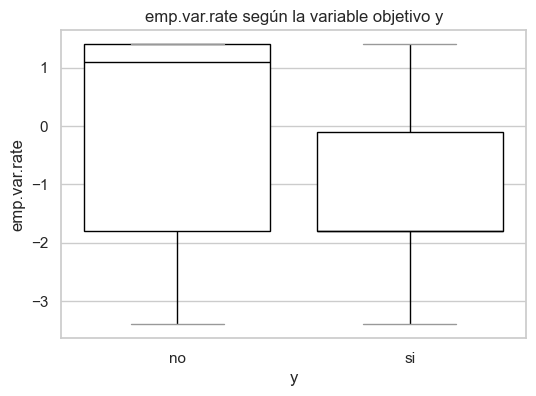

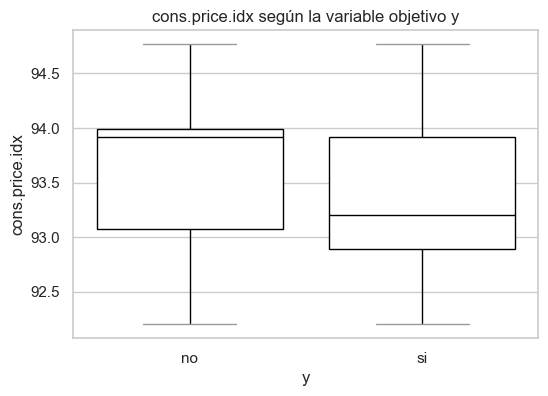

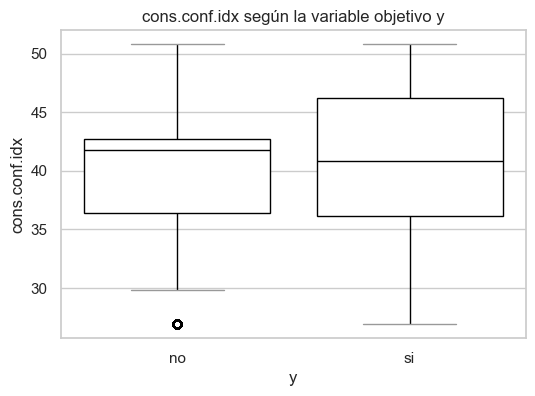

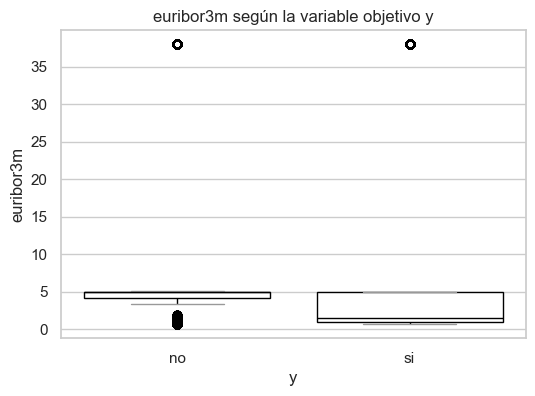

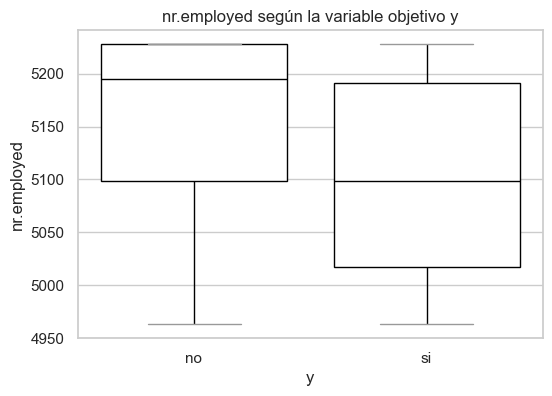

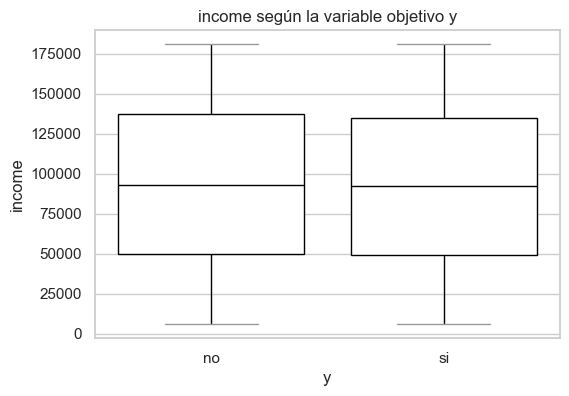

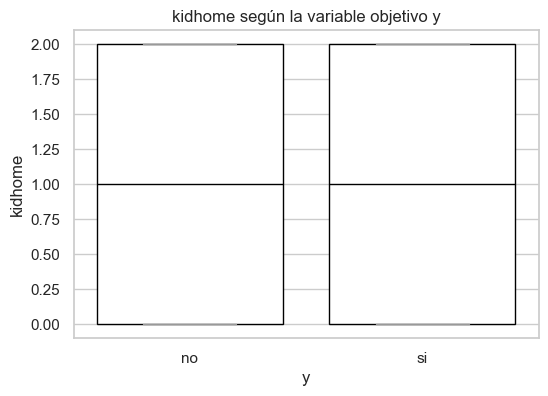

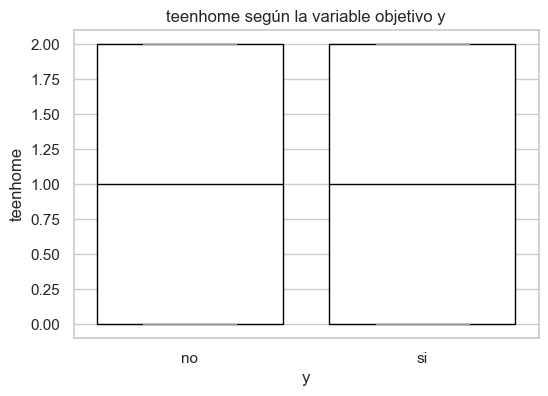

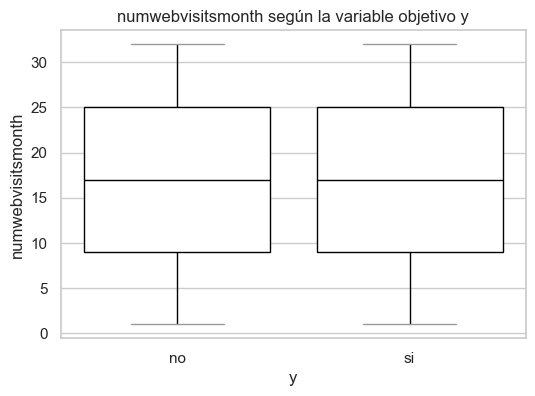

In [ ]:
for col in cols_num:

    plt.figure(figsize=(6, 4))

    sns.boxplot(
        
        x='y',

        y=col,

        data=df_final,

        color='white', 

        boxprops={'edgecolor': 'black'},

        whiskerprops={'color': 'black'},

        medianprops={'color': 'black'},

        flierprops={'markeredgecolor': 'black'})
    
    plt.title(f'{col} según la variable objetivo y')
    
    plt.show()

**Observaciones:**

`age`: Los boxplots de age para `y = "no"` y `y = "si"` presentan una forma muy similar, con rangos intercuartílicos y medianas prácticamente coincidentes. No se aprecia separación relevante entre clases, lo que indica que la edad no discrimina de forma clara entre clientes que contratan y los que no.

`duration`: Los boxplots muestran una separación muy clara entre ambas clases, el rango intercuartílico y la mediana de duration para `y = "si"` están desplazados hacia valores mucho más altos que para `y = "no"`. Además, la distribución de `y = "si"` presenta una cola más larga en valores altos, lo que refuerza la idea de que las llamadas exitosas tienden a ser más largas y con mayor variabilidad.

`campaign`: Los boxplots de esta variable muestran distribuciones muy parecidas entre `y = "no"` y `y = "si"`, con medianas y rangos muy próximos y presencia de algunos valores extremos en ambas clases. No se observa un patrón gráfico que sugiera una relación fuerte entre el número de contactos y la respuesta final.

`emp.var.rate`: El boxplot de `y = "si"` se desplaza claramente hacia valores más bajos respecto al de `y = "no"`. La mediana se sitúa en un nivel más negativo, y el rango es distinto entre clases. Esto indica que las contrataciones se producen más frecuentemente en entornos macroeconómicos con menor variación del empleo.

`cons.price.idx`: El boxplot muestra que los clientes que contratan `y = "si"` tienden a situarse en niveles ligeramente inferiores del índice de precios en comparación con los que no contratan. Aunque la diferencia no es muy pronunciada, se mantiene un desplazamiento sistemático.

`cons.conf.idx`: El grupo `y = "si"` presenta valores algo más bajos de confianza del consumidor, con un boxplot ligeramente desplazado hacia abajo. La separación es moderada, pero consistente, indicando que las respuestas positivas se concentran en periodos de menor confianza económica.

`euribor3m`: Se observa una diferencia clara, el boxplot de `y = "si"` está desplazado hacia niveles de euríbor mucho más bajos que el de `y = "no"`. La mediana del grupo **“si”** se sitúan en valores considerablemente inferiores, lo que sugiere que la probabilidad de contratación es mayor en contextos con tipos de interés más bajos.

`income`: Aunque existen outliers de renta elevada en ambos grupos, los boxplots de income para `y = "no"` y `y = "si"` son muy similares en posición y dispersión. Esto confirma que, visualmente, los niveles de ingreso no difieren de forma sustancial entre quienes contratan y quienes no.

`kidhome, teenhome, numwebvisitsmonth`: En estas variables, los boxplots por clase de `y` son prácticamente indistinguibles, mismos rangos, mismas medianas y una dispersión muy similar. Ello sugiere que el número de hijos en el hogar y la frecuencia de visitas web no muestran diferencias apreciables entre clientes que responden positivamente y negativamente a la campaña.

In [12]:
df_final.groupby('y')[cols_num].median().T

y,no,si
age,38.0,38.0
duration,163.0,453.0
campaign,2.0,2.0
emp.var.rate,1.1,-1.8
cons.price.idx,93.918,93.2
cons.conf.idx,41.8,40.8
euribor3m,4.958,1.405
nr.employed,5195.0,5099.0
income,93042.0,91922.0
kidhome,1.0,1.0


**Observaciones:**

`age`: La mediana es de 38 años tanto en el grupo `y = "no"` como en el grupo `y = "si"`. Esta coincidencia indica que la edad no introduce diferencias significativas entre los clientes que contratan y los que no. El perfil típico de edad se mantiene estable en ambos segmentos, por lo que esta variable no parece aportar poder discriminativo en términos de centralidad.

`duration`: Es la variable que muestra la diferencia más clara entre clases. La mediana de duration pasa de **163** segundos en el grupo `y = "no"` a **453** segundos en el `grupo y = "si"`. Esto indica que las llamadas asociadas a clientes que contratan tienden a ser sensiblemente más largas, lo que sugiere que una mayor duración de la interacción se relaciona con una mayor probabilidad de éxito de la campaña.

`campaign`: La mediana se mantiene en 2 contactos tanto para `y = "no"` como para `y = "si"`. Esto indica que en términos de número típico de interacciones, no existen diferencias relevantes entre quienes contratan y quienes no. La variable, por tanto, no parece influir en el resultado de la campaña cuando se analiza su valor central.

`emp.var.rate`: La mediana desciende de 1.1 en `y = "no"` a –1.8 en `y = "si"`. Esto refleja que las contrataciones se concentran en periodos donde la variación del empleo es más negativa. Es decir, cuando el contexto laboral es menos favorable, la probabilidad de contratación parece aumentar, lo que puede estar relacionado con cambios en la percepción o comportamiento del cliente ante condiciones económicas más adversas.

`cons.price.idx`: La mediana del índice de precios pasa de 93.91 en el grupo`y = "no"` a 93.2 en el grupo `y = "si"`. Aunque la diferencia es moderada, muestra un desplazamiento sistemático hacia valores ligeramente más bajos entre los clientes que contratan. Esto sugiere que la campaña puede resultar más efectiva en periodos con cierta contención de precios.

`cons.conf.idx`: La mediana disminuye de **41.8** en `y = "no"` a **40.8** en `y = "si"`. Esta diferencia, aunque pequeña, indica que los clientes que finalmente contratan tienden a encontrarse en contextos de menor confianza del consumidor. El patrón es consistente con el observado en otras variables macroeconómicas que identifican un entorno económico menos favorable en los casos de contratación.

`euribor3m`:La mediana de esta variable muestra una diferencia muy marcada: cae de 4.958 en el grupo y = "no" a 1.405 en el grupo y = "si". Esto implica que la contratación es más habitual en periodos con tipos de interés considerablemente más bajos. La magnitud de la diferencia sugiere que esta variable puede ser especialmente relevante para explicar el comportamiento de los clientes.

`income`:La mediana desciende de 93.042 en `y = "no"` a 91.922 `y = "si"` en los casos de contratación, pero la diferencia es mínima. Esto indica que, en términos de nivel de ingresos, los clientes que contratan y los que no presentan perfiles prácticamente equivalentes. La variable muestra una capacidad discriminativa muy limitada en este análisis.

`kidhome`:La mediana es 1 en ambos grupos, lo que confirma que el número de hijos pequeños en el hogar no genera diferencias entre clientes que contratan y los que no. La variable parece tener un peso marginal en la respuesta.

`teenhome`: La mediana es 1 para ambas clases, no muestra variación entre grupos y por tanto no parece relevante para explicar el comportamiento de contratación.

`numwebvisitsmonth`: La mediana es 17 visitas tanto para `y = "no"` como para `y = "si"`. Esto indica que la frecuencia de visitas a la web no presenta diferencias en su valor central entre los dos grupos, por lo que no parece tener un efecto directo sobre el resultado de la campaña.

En resumen, el análisis bivariante de las varibles numéricas vs `y` destaca que la duración de la llamada es el factor numérico con mayor capacidad discriminativa, con valores claramente superiores en los casos de contratación.
 
Asimismo, las variables macroeconómicas presentan medianas más bajas en el grupo que contrata, lo que indica que el contexto económico influye en la respuesta del cliente y sugiere que el entorno macroeconómico en el momento del contacto está relacionado con la probabilidad de éxito, mientras que el resto de variables numéricas exhiben medianas muy similares entre clases, por lo que aportan una capacidad explicativa limitada en este nivel de análisis.

## Análisis bivariante de variables catégoricas vs `y`

### Tablas de contingencia

In [13]:
for col in cols_cate:

    print(f'\nRelación entre {col} e y')

    tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100
    
    display(tabla.round(2))


Relación entre job e y


y,no,si
job,,
admin.,87.06,12.94
blue-collar,93.02,6.98
entrepreneur,91.95,8.05
housemaid,90.28,9.72
management,88.91,11.09
retired,75.36,24.64
self-employed,88.82,11.18
services,92.07,7.93
student,70.42,29.58



Relación entre marital e y


y,no,si
marital,,
divorced,89.70,10.30
married,89.90,10.10
single,86.43,13.57



Relación entre education e y


y,no,si
education,,
basic.4y,89.64,10.36
basic.6y,91.81,8.19
basic.9y,92.32,7.68
high.school,89.09,10.91
illiterate,77.78,22.22
professional.course,88.67,11.33
university.degree,86.36,13.64



Relación entre housing e y


y,no,si
housing,,
no,89.25,10.75
si,88.59,11.41



Relación entre loan e y


y,no,si
loan,,
no,88.81,11.19
si,89.38,10.62



Relación entre contact e y


y,no,si
contact,,
cellular,85.57,14.43
telephone,94.84,5.16



Relación entre poutcome e y


y,no,si
poutcome,,
failure,86.51,13.49
nonexistent,91.20,8.80
success,35.19,64.81



Relación entre y e y


y,no,si
y,,
no,100.0,0.0
si,0.0,100.0



Relación entre id e y


y,no,si
id,,
0000e811-006e-4404-b535-89bf6cd96553,100.0,0.0
0000ea53-e9b2-4b3f-9f4b-058f37e5fab8,0.0,100.0
000165f9-20c0-4cb5-bd47-6233b92655c1,100.0,0.0
00024507-c59b-4eee-86d5-cc341b96eb6d,100.0,0.0
0004e1d1-958d-4abf-a57c-9b9c7be887a0,0.0,100.0
...,...,...
fff67187-c301-41e8-a58a-b2daf7ff17e0,100.0,0.0
fffbc6e6-cc6b-43e7-8541-6318cfb030c6,100.0,0.0
fffd1227-80ee-4feb-98e0-3e4c7f8c30fd,100.0,0.0


**Observaciones:**

`job`: Muestra diferencias claras en la tasa de respuesta. La media global de "si" es aproximadamente 11 %. Por encima de esa referencia se sitúan student (29,58 %), retired (24,64 %), unemployed (14,66 %), admin. (12,94 %), así como self-employed (11,18 %) y management (11,09 %), que presentan proporciones de "si" iguales o superiores a la media. En cambio, categorías como blue-collar (6,98 %), basic-level services como services (7,93 %) y entrepreneur (8,05 %), junto con housemaid (9,72 %) y technician (10,66 %), muestran tasas de respuesta claramente inferiores. Esto sugiere que el tipo de ocupación está relacionado con la probabilidad de contratación.

`marital`: En marital, la categoría single presenta una proporción de "si" del 13,57 %, superior a la media, mientras que married (10,10 %) y divorced (10,30 %) se sitúan ligeramente por debajo. Esto indica que los clientes solteros muestran una ligera mayor propensión a contratar que los casados o divorciados, si bien las diferencias no son muy acusadas.

`education`: La variable education también presenta patrones diferenciados. La categoría university.degree alcanza un 13,64 % de "si", por encima de la media, al igual que professional.course (11,33 %). La categoría illiterate registra un 22,22 %, claramente superior, aunque debe interpretarse con cautela por su tamaño muestral muy reducido. Por debajo de la media se sitúan los niveles básicos: basic.9y (7,68 %), basic.6y (8,19 %) y basic.4y (10,36 %), lo que sugiere que un mayor nivel educativo se asocia, en general, con una mayor probabilidad de contratación.

`housing`: En housing, las diferencias son pequeñas: los clientes con hipoteca ("si") presentan un 11,41 % de "si", frente a un 10,75 % en el grupo sin hipoteca ("no"). Aunque la diferencia es moderada, los clientes con hipoteca muestran una tasa de respuesta ligeramente superior a la de aquellos que no la tienen.

`loan`: En loan la situación es casi inversa y también con diferencias muy reducidas: los clientes sin préstamo personal ("no") presentan un 11,19 % de "si", muy próximo a la media global, mientras que los con préstamo ("si") se quedan en un 10,62 %. En conjunto, la variable no muestra un efecto claro y la diferencia entre categorías es poco relevante.

`contact`: La variable contact presenta uno de los contrastes más marcados. Cuando el contacto se realiza por telefonía móvil (cellular), la proporción de "si" asciende al 14,43 %, claramente por encima de la media. En cambio, cuando se realiza mediante línea fija (telephone), la tasa de "si" cae al 5,16 %, muy por debajo. Esto indica que el canal de contacto tiene un impacto relevante en la eficacia de la campaña, siendo el móvil claramente más efectivo.

`poutcome`: poutcome es la variable categórica con mayor capacidad discriminativa. Los clientes con resultado previo success presentan una tasa de "si" del 64,81 %, muy superior a la media, mientras que los de failure se sitúan en un 13,49 %, ligeramente por encima del global. En cambio, cuando el resultado previo es nonexistent, la proporción de "si" baja al 8,80 %, por debajo de la media. Esto confirma que disponer de un historial previo de éxito en campañas anteriores es un fuerte predictor de contratación en la campaña actual.

`y e id`: En la tabla y vs y, cada categoría se asocia al 100 % de sí misma por construcción, por lo que no aporta información adicional.

En id, cada identificador aparece vinculado a un único valor de y (0 % / 100 %), ya que se trata de identificadores únicos de cliente. No es una variable explicativa útil en términos de proporciones, sino una clave técnica para distinguir registros.

### Barras apiladas

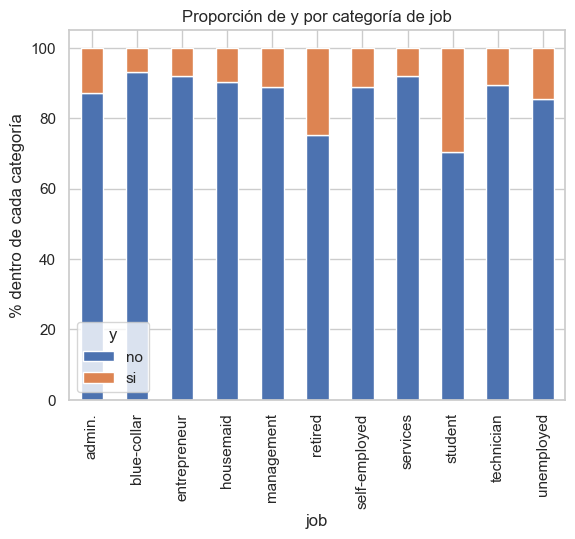

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,87.06,93.02,91.95,90.28,88.91,75.36,88.82,92.07,70.42,89.34,85.34
si,12.94,6.98,8.05,9.72,11.09,24.64,11.18,7.93,29.58,10.66,14.66


In [14]:
col = 'job'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`job`: El grafico muestra una clara heterogeneidad en la proporción de `y = "si"` entre ocupaciones, destacan especialmente **student** (29,58 %) y **retired** (24,64 %), con tasas de respuesta muy superiores a la media global (~11 %), seguidos de **unemployed** y **admin**, también por encima de dicha referencia. En contraste, categorías como **blue-collar**, **services** o **entrepreneur** presentan proporciones de `“si”` sensiblemente menores. Esto confirma que el perfil laboral del cliente está estrechamente ligado a la probabilidad de contratación.

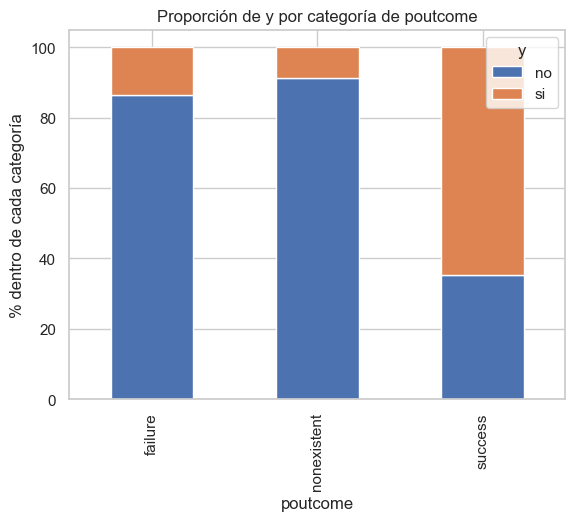

poutcome,failure,nonexistent,success
y,,,
no,86.51,91.2,35.19
si,13.49,8.8,64.81


In [15]:
col = 'poutcome'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`poutcome`: El gráfico muestra el patrón más extremo, la categoría **success** presenta una proporción de `y = "si"` del 64,81 %, dominando la barra casi por completo y muy por encima de la media global. En **failure** la tasa de éxito es moderada del 13,49 %, ligeramente superior al promedio, mientras que en **nonexistent** apenas llega al 8,80 %, claramente por debajo. Este comportamiento refleja que disponer de un historial previo de éxito en campañas anteriores es un fuerte predictor de respuesta positiva en la campaña actual.

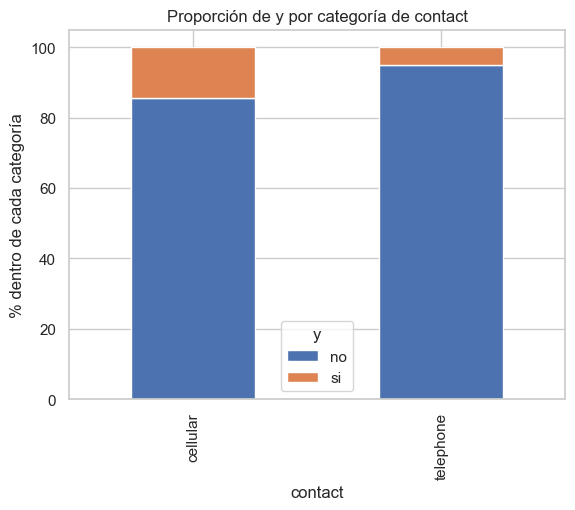

contact,cellular,telephone
y,,
no,85.57,94.84
si,14.43,5.16


In [16]:
col = 'contact'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`contact`: Se observa un contraste muy marcado entre canales, cuando el contacto se realiza por telefonía móvil (cellular), la proporción de `y = "si"` alcanza el 14,43 %, significativamente por encima de la media, en cambio, para telefono fijo (telephone) la tasa de éxito desciende al 5,16 %, muy por debajo. Visualmente, las barras muestran un peso mucho mayor del segmento `“sí”` en el canal móvil, lo que indica que el uso de cellular resulta claramente más efectivo para la campaña.

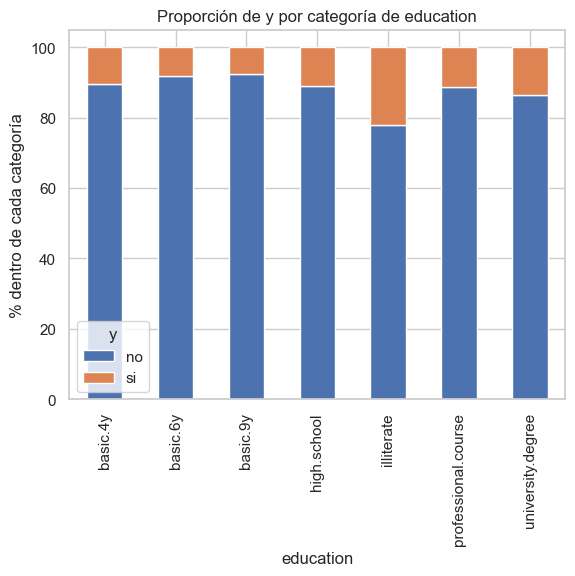

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
y,,,,,,,
no,89.64,91.81,92.32,89.09,77.78,88.67,86.36
si,10.36,8.19,7.68,10.91,22.22,11.33,13.64


In [17]:
col = 'education'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`education`: Se aprecia un patrón en el que los niveles formativos más altos, como **university.degree** con un 13,64 % y **professional.course** con un 11,33 %, muestran una proporción de `y = "si"` igual o superior a la media, mientras que los niveles básicos **basic.9y**, **basic.6y**, **basic.4y** quedan por debajo. La categoría **illiterate** presenta una tasa elevada de 22,22 %, aunque su frecuencia es mínima. En conjunto, el gráfico sugiere que un mayor nivel educativo se asocia con una mayor probabilidad de respuesta positiva.

## Correlación entre las variables numéricas


### Matriz de correlación

In [18]:
corr_matrix = df_final[cols_num].corr()
corr_matrix.round(2)

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,income,kidhome,teenhome,numwebvisitsmonth
age,1.00,0.00,0.00,-0.01,-0.00,-0.12,-0.00,-0.02,0.00,-0.00,0.00,-0.00
duration,0.00,1.00,-0.07,-0.02,0.01,0.01,-0.01,-0.04,-0.00,-0.00,-0.01,0.00
campaign,0.00,-0.07,1.00,0.15,0.13,0.01,0.01,0.14,-0.01,-0.01,0.00,0.00
emp.var.rate,-0.01,-0.02,0.15,1.00,0.78,-0.21,0.09,0.91,-0.01,-0.01,0.00,-0.01
cons.price.idx,-0.00,0.01,0.13,0.78,1.00,-0.07,0.06,0.53,-0.01,0.00,0.00,-0.01
cons.conf.idx,-0.12,0.01,0.01,-0.21,-0.07,1.00,-0.03,-0.11,-0.00,0.00,-0.00,-0.00
euribor3m,-0.00,-0.01,0.01,0.09,0.06,-0.03,1.00,0.09,0.00,-0.01,0.00,0.00
nr.employed,-0.02,-0.04,0.14,0.91,0.53,-0.11,0.09,1.00,-0.01,-0.01,-0.00,-0.01
income,0.00,-0.00,-0.01,-0.01,-0.01,-0.00,0.00,-0.01,1.00,0.00,0.01,0.01
kidhome,-0.00,-0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,0.00,1.00,0.00,-0.00


**Observaciones:**

En general la matriz uestra relaciones bajas o moderadas entre las variables numéricas, lo que indica que no existe una multicolinealidad fuerte en la mayoría de los casos. Destaca la presencia de correlaciones positivas relativamente elevadas entre algunas variables macroeconómicas, **como euribor3m**, **emp.var.rate** y **nr.employed**, lo cual es esperable porque reflejan tendencias económicas comunes. También se observa que **duration** presenta correlaciones muy bajas con el resto de variables, coherente con el hecho de que es una variable asociada directamente a la llamada y no al perfil del cliente ni al entorno económico. Por otro lado, variables como **age**, **income** o **numwebvisitsmonth** muestran correlaciones débiles entre sí y con el resto, lo que sugiere que aportan información relativamente independiente en el conjunto de datos.

### Mapa de calor

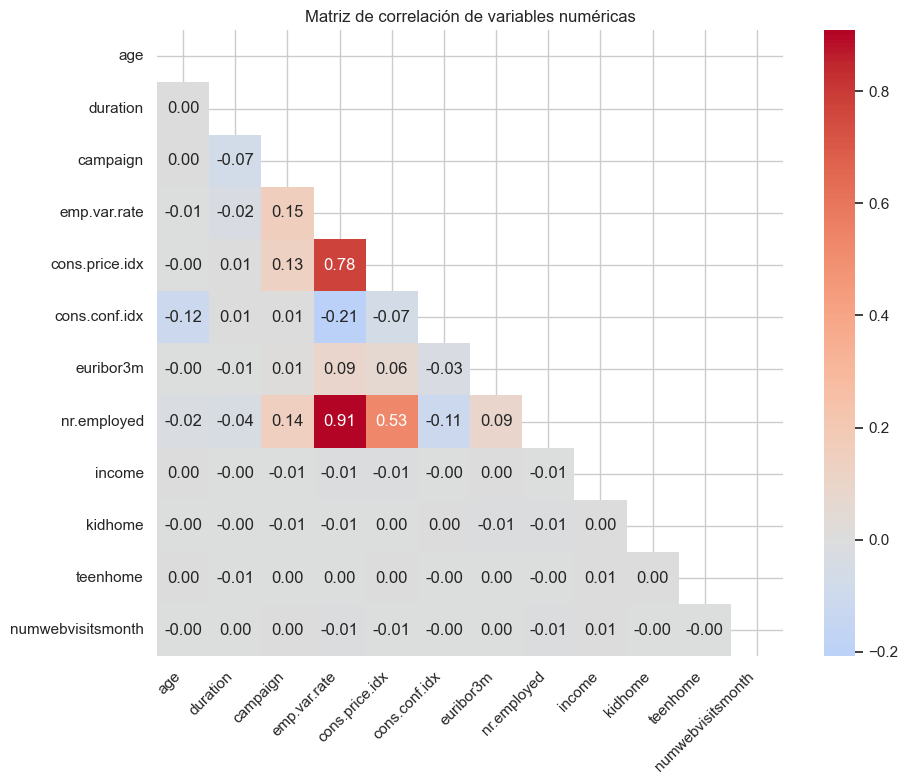

In [19]:
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap( corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)

plt.title('Matriz de correlación de variables numéricas')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

**Observaciones:**

El mapa de calor ofrece una visualización mas intuitiva de la intensidad y el sentido de las correlaciones entre las variables. La paleta divergente centrada en cero permite distinguir fácilmente las asociaciones positivas y negativas. Se aprecia claramente un bloque de correlaciones positivas entre las variables macroeconómicas **euribor3m**, **emp.var.rate**, **nr.employed**, mientras que el resto del mapa muestra tonos más neutros relacionados con valores más cercanos al cero, indicando relaciones débiles. El uso del triángulo inferior facilita la interpretación evitando duplicidades. En conjunto, el mapa confirma que la mayoría de las variables numéricas no presentan solapamientos fuertes, y que el entorno macroeconómico constituye el grupo más cohesionado dentro del conjunto, mientras que el resto de variables numéricas mantiene correlaciones bajas entre sí.

## Análisis temporal

### Creación de variables temporales

Se generan las variables `year_contact` y `month_contact` a partir de la variable `date`, extrayendo respectivamente el año y el mes en formato numérico. Estas variables permiten analizar la evolución de la campaña en el tiempo, así como identificar posibles patrones estacionales o cambios de comportamiento por periodo.

In [20]:
df_final['year_contact']  = df_final['date'].dt.year

df_final['month_contact'] = df_final['date'].dt.month

print(df_final['year_contact'])

print(df_final['month_contact'])

0        2019
1        2016
2        2019
3        2015
4        2017
         ... 
39267    2015
39268    2018
39269    2016
39270    2019
39271    2019
Name: year_contact, Length: 39272, dtype: int32
0         8
1         9
2         2
3        11
4         1
         ..
39267    10
39268     3
39269     9
39270     9
39271    11
Name: month_contact, Length: 39272, dtype: int32


A partir de la variable `Dt_Customer` se derivan las nuevas columnas `year_customer` y `month_customer`, que recogen el año y el mes en que cada usuario se incorporó como cliente. Estas variables permiten estudiar la distribución temporal de las altas, identificar posibles concentraciones en determinados periodos y evaluar si la antigüedad en la entidad influye en la respuesta a la campaña.

In [21]:
df_final['year_customer']  = df_final['dt_customer'].dt.year

df_final['month_customer'] = df_final['dt_customer'].dt.month

print(df_final['year_customer'])

print(df_final['month_customer'])

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
39267    2014
39268    2014
39269    2014
39270    2014
39271    2014
Name: year_customer, Length: 39272, dtype: int32
0         4
1        12
2         2
3        12
4         6
         ..
39267     3
39268     3
39269     9
39270     5
39271     9
Name: month_customer, Length: 39272, dtype: int32


### Antigüedad del cliente 

Se incorpora la variable `days_until_signup`, calculada como la diferencia en días entre la fecha de contacto `date` y la fecha de alta del cliente `Dt_Customer`. Esta medida de antigüedad facilita el estudio de cómo la duración de la relación con la entidad influye en la probabilidad de respuesta a la campaña.

In [40]:
df_final['days_until_signup'] = (df_final['date'] - df_final['dt_customer'])

df_final['days_until_signup']

0       2676 days
1       1354 days
2       2570 days
3       1073 days
4       1684 days
           ...   
39267    584 days
39268   1467 days
39269    728 days
39270   1955 days
39271   1864 days
Name: days_until_signup, Length: 39272, dtype: timedelta64[ns]

### Volumen de contactos en el tiempo

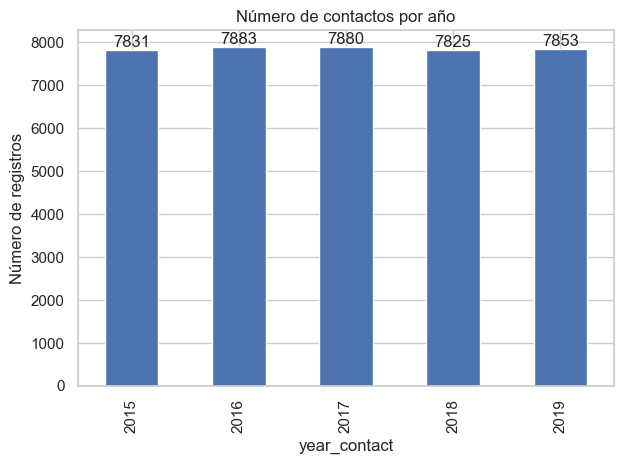

In [23]:
count_year = df_final['year_contact'].value_counts().sort_index()

ax = count_year.plot(kind='bar')

plt.title('Número de contactos por año')

plt.ylabel('Número de registros')

for i, v in enumerate(count_year):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

El número de contactos por año muestra una distribución muy estable entre 2015 y 2019, con volúmenes anuales prácticamente idénticos, esta uniformidad indica que la entidad mantuvo un nivel de actividad similar durante todo el periodo, sin incrementos ni descensos relevantes en la intensidad de las campañas. 

La ausencia de variaciones destacables sugiere que no hubo cambios estratégicos significativos en la frecuencia de contacto a lo largo de estos años, lo que facilita la comparación temporal y reduce la posibilidad de que los resultados estén influenciados por fluctuaciones operativas.

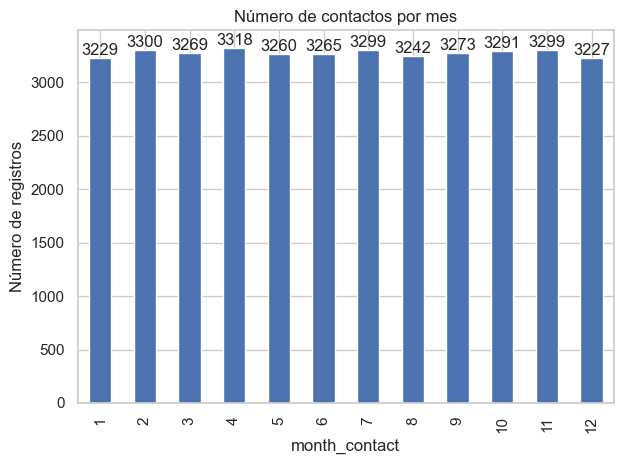

In [24]:
count_month = df_final['month_contact'].value_counts().sort_index()

ax2 = count_month.plot(kind='bar')

plt.title('Número de contactos por mes')

plt.ylabel('Número de registros')

for i, v in enumerate(count_month):
    ax2.text(i, v, str(v), ha = 'center', va='bottom')

plt.tight_layout()

plt.show()

La distribución de contactos por mes revela un patrón prácticamente uniforme a lo largo del año, con valores que oscilan ligeramente en torno a los 3.200–3.300 registros mensuales. No se observan picos estacionales ni meses con actividad significativamente superior o inferior, lo que indica que la campaña se ejecutó de manera sostenida sin concentrarse en periodos específicos. 

Esta estabilidad mensual sugiere que el calendario de contacto no estuvo condicionado por factores estacionales y que las variaciones en el comportamiento del cliente no pueden atribuirse a cambios en la intensidad de la campaña según el mes.

### Tasa de éxito a lo largo del tiempo

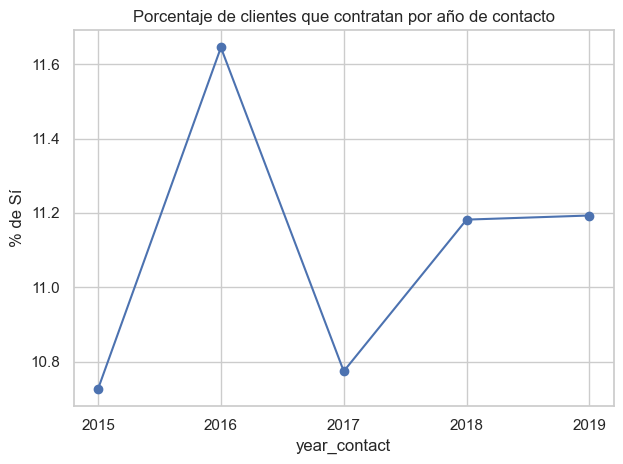

In [39]:
tasa_anual = pd.crosstab(df_final['year_contact'], df_final['y'], normalize='index') * 100

ax = tasa_anual['si'].plot(marker='o')

ax.set_xticks(tasa_anual.index)                    

ax.set_xticklabels(tasa_anual.index.astype(int))   

plt.title('Porcentaje de clientes que contratan por año de contacto')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()


El porcentaje de clientes que contratan muestra variaciones moderadas a lo largo del periodo analizado. En 2016 se alcanza el valor más alto en torno al 11,7 %, seguido de un descenso notable en 2017, año con la tasa más baja, por debajo del 10,8%. A partir de 2018 se observa una recuperación gradual, aunque sin superar el nivel máximo registrado en el 2016. 

En conjunto, la serie no revela una tendencia claramente creciente o decreciente, sino fluctuaciones puntuales que podrían estar asociadas a factores externos o a diferencias en la ejecución de las campañas.


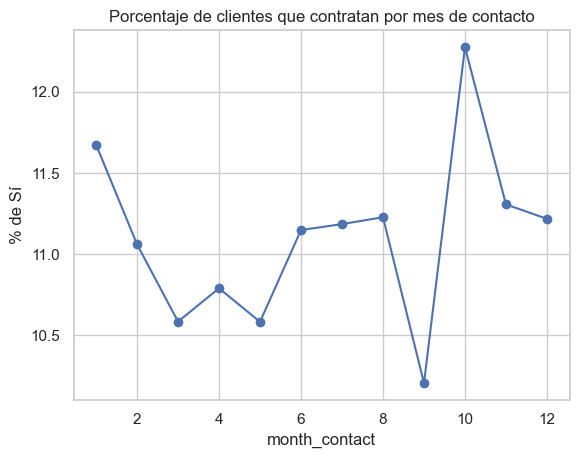

In [26]:
tasa_mensual = pd.crosstab(df_final['month_contact'], df_final['y'], normalize='index') * 100

tasa_mensual['si'].plot(marker='o')

plt.title('Porcentaje de clientes que contratan por mes de contacto')

plt.ylabel('% de Sí')

plt.show()


El porcentaje medio de contratación por mes, agregando los datos de 2015 a 2019, muestra variaciones moderadas a lo largo del año. Se aprecia un descenso inicial entre enero y marzo, seguido de oscilaciones suaves durante el resto del año, en septiembre se observa la tasa más baja del periodo, mientras que el máximo se registra en octubre, que destaca claramente sobre el resto de meses. Aunque existen estas diferencias puntuales, el comportamiento general no evidencia una estacionalidad fuerte, ya que la mayoría de los meses mantienen niveles de respuesta relativamente próximos entre sí. Este patrón indica que, en promedio, la propensión a contratar no depende de manera fuerte del mes en que se realiza el contacto.

## Altas de clientes en el tiempo

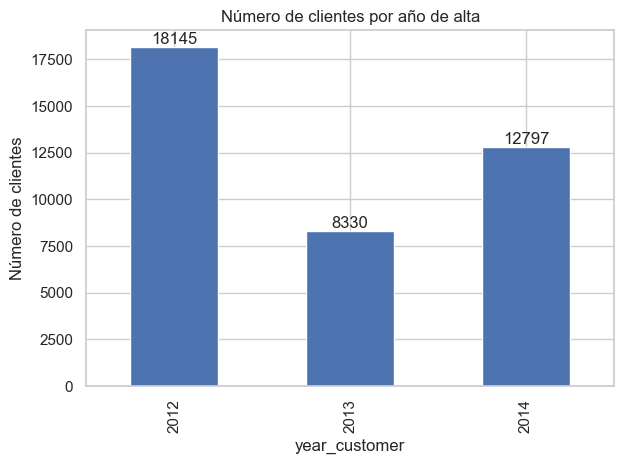

In [41]:
count_year_customer = df_final['year_customer'].value_counts().sort_index()

ax = count_year_customer.plot(kind='bar')

plt.title('Número de clientes por año de alta')

plt.ylabel('Número de clientes')

for i, v in enumerate(count_year_customer):
    
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

El número de clientes incorporados varía de forma notable entre los años analizados. El año 2012 concentra el mayor volumen de altas, superando claramente a 2013 y 2014, lo que indica un periodo de expansión intensa de la base de clientes, mientras que en el 2013 se observa un descenso significativo, seguido de una recuperación parcial en 2014. 

Este patrón sugiere que el crecimiento de la cartera no fue uniforme y que existieron momentos específicos con mayor capacidad de captación por parte de la entidad.

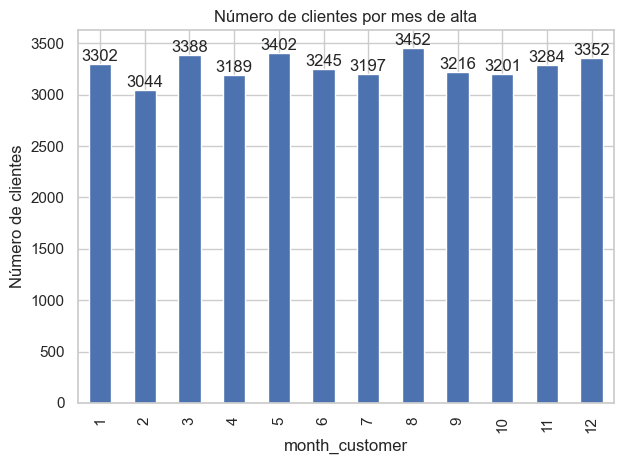

In [28]:
count_month_customer = df_final['month_customer'].value_counts().sort_index()

ax = count_month_customer.plot(kind='bar')

plt.title('Número de clientes por mes de alta')

plt.ylabel('Número de clientes')

for i, v in enumerate(count_month_customer):

    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

El gráfico muestra el número total de altas acumuladas por mes entre 2012 y 2014. La distribución es bastante homogénea, con valores en torno a los 3.200–3.400 clientes mensuales. El mínimo se registra en febrero con 3.044 altas, mientras que los máximos se concentran en los meses de mayo 3.402 y agosto 3.452. Estas diferencias apuntan a ligeros picos de captación en determinados meses, pero sin una estacionalidad muy marcada, ya que el volumen de incorporaciones se mantiene relativamente estable a lo largo del año.

## Tasa de éxito según año de alta

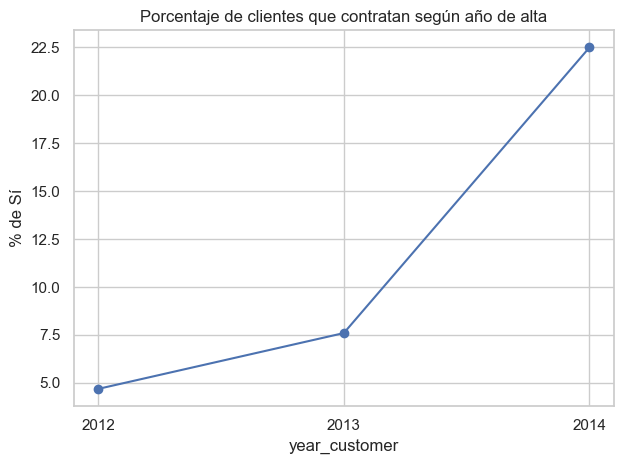

In [29]:
tasa_exito = pd.crosstab(df_final['year_customer'], df_final['y'], normalize='index') * 100

ax = tasa_exito['si'].plot(marker='o') 

ax.set_xticks(tasa_exito.index)      

ax.set_xticklabels(tasa_exito.index.astype(int))     

plt.title('Porcentaje de clientes que contratan según año de alta')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()

El porcentaje de contratación según el año de alta muestra un patrón claramente creciente, los clientes incorporados en 2012 presentan la tasa más baja, mientras que los de 2013 mejoran ligeramente y los de 2014 alcanzan el porcentaje más alto de respuesta. Este comportamiento indica que los clientes más recientes son los que muestran mayor propensión a contratar el depósito, mientras que la probabilidad de conversión disminuye entre los clientes con mayor antigüedad. En conjunto, el resultado sugiere que la novedad en la relación con la entidad podría estar asociada a una mayor receptividad ante una nueva oferta comercial.

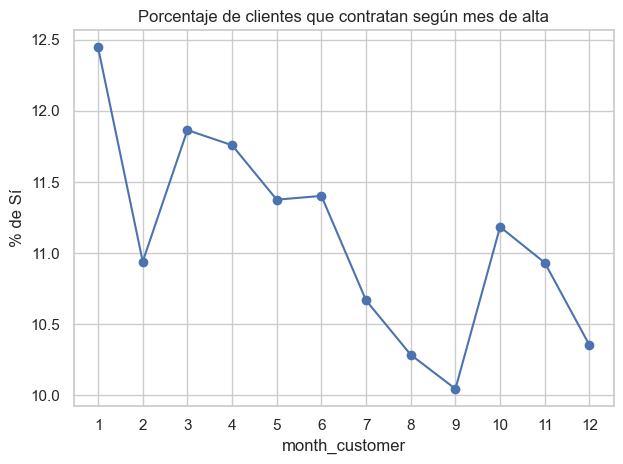

In [30]:
tasa_exito2 = pd.crosstab(df_final['month_customer'], df_final['y'], normalize='index') * 100

ax = tasa_exito2['si'].plot(marker='o') 

ax.set_xticks(tasa_exito2.index)      

ax.set_xticklabels(tasa_exito2.index.astype(int))     

plt.title('Porcentaje de clientes que contratan según mes de alta')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()

El porcentaje de contratación según el mes de alta muestra variaciones moderadas a lo largo del año, sin un patrón estacional claramente definido. Los clientes dados de alta en enero presentan la mayor tasa de respuesta, mientras que los incorporados en septiembre registran el valor más bajo, con una diferncia cercana al 2,5%. A pesar de estas diferencias puntuales, la mayoría de los meses se sitúan en un rango relativamente estrecho, lo que sugiere que el mes en el que un cliente se convierte en cliente no constituye un factor determinante en su propensión a contratar el depósito.

## Antiguedad del cliente en el momento del contacto

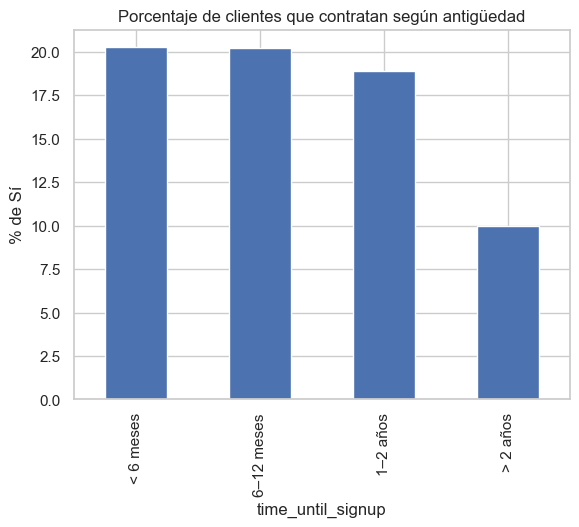

In [35]:
df_final['days_until_signup_num'] = df_final['days_until_signup'].dt.days

dias = [-1, 180, 365, 730, 3650]

grupos = ['< 6 meses', '6–12 meses', '1–2 años', '> 2 años']

df_final['time_until_signup'] = pd.cut(df_final['days_until_signup_num'], bins=dias, labels=grupos)

tasa_antiguedad = pd.crosstab(df_final['time_until_signup'], df_final['y'], normalize='index') * 100

tasa_antiguedad['si'].plot(kind='bar')

plt.title('Porcentaje de clientes que contratan según antigüedad')

plt.ylabel('% de Sí')

plt.show()


El porcentaje de contratación varía claramente según la antigüedad del cliente. Los segmentos más recientes con menos de 6 meses y entre 6 y 12 meses desde el alta, presentan las tasas más elevadas de respuesta, en torno al 20 %. A medida que aumenta la antigüedad, la probabilidad de contratación disminuye de forma progresiva, especialmente en el grupo de más de 2 años, que registra apenas un 10 %. Este patrón indica que los clientes nuevos muestran una mayor receptividad a la campaña, mientras que la fidelidad o una relación prolongada con la entidad no se asocia con una mayor propensión a contratar el depósito.